In [1]:
!rm -r '/content/plots'

In [2]:
from scipy import special as sp
from scipy.stats import gaussian_kde
import random
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams.update({'figure.max_open_warning': 0})
# np.seterr(all='raise')

### PARAMETERS
nMaxGen = 100
nPopulation = 1000
kappa = 1
mu = 4
r_hat = 1
numSamples = 200 # number of generated samples
numSim = 10**6 # number of gaussian points
theta = [kappa, mu, r_hat]
savePlots = True
showPlots = True

In [3]:
class KappaMu():
  '''
  KappaMu fading distribution Class
  '''
  def __init__(self, kappa, mu, r_hat, numSamples, numSim):
    # Parameters
    self.kappa = kappa
    self.mu = mu
    self.r_hat = r_hat  
    self.numSamples = numSamples
    self.numSim = numSim

    # For simulated densities
    self.generateSamples = self.generateSamples()
    self.X, self.Y = self.envelopeDensity(self.numSamples)

  def _pdf(self, r):
    '''
    Function to calculate kappa-mu pdf.
    Equation extracted from:
    https://www.fee.unicamp.br/sites/default/files/docentes/michel/the_kappa-mu_distribution_and_the_eta-mu_distribution.pdf
    Eq. (1) with rho = R = r / r_hat
    '''

    A = (2*self.mu * ((1 + self.kappa)**((self.mu+1)/2))) \
            /((self.kappa**((self.mu - 1)/2)) * np.exp(self.mu * self.kappa))
    R = r / self.r_hat
    B = (R**self.mu) * np.exp(- self.mu*(1 + self.kappa)*(R**2))
    C = sp.iv(self.mu - 1, 2*self.mu * R * np.sqrt(self.kappa*(1 + self.kappa)))
    PDF = A * B * C / self.r_hat 
    return PDF

  def scatteredComponent(self):
    '''
    Function to calculate scattered signal component's power
    '''
  
    sigma = self.r_hat / np.sqrt( 2 * self.mu * (1+self.kappa) )
  
    return sigma

  def generateGaussians(self, mean, sigma):
    '''
    Function to generate gaussian RVs
    '''

    gaussians = np.random.default_rng().normal(mean, sigma, self.numSim)
      
    return gaussians

  def generateSamples(self):
    '''
    Function to generate complex kappa-mu fading RVs
    '''
    
    p_i, q_i = self.calculateMeans()
    sigma = self.scatteredComponent()
    
    fading = 0
    for i in range(int(self.mu)):
        X_i = self.generateGaussians(p_i, sigma)
        Y_i = self.generateGaussians(q_i, sigma)
        fading = fading + X_i**(2) + Y_i**(2)  
    return fading

  def calculateMeans(self):
    '''
    Function to calculate IQ means
    '''
  
    d2 = (self.r_hat**(2) * self.kappa)/(1 + self.kappa);
  
    p_i = np.sqrt(d2/(2*self.mu))
    q_i = np.copy(p_i)
      
    return p_i, q_i

  def envelopeDensity(self, numSamples):
    '''
    Function for returning X and Y axes for each
    densities for each simulated sample
    '''
      
    R = np.sqrt(self.generateSamples)
    kde = gaussian_kde(R)
    x = np.linspace(R.min(), R.max(), numSamples)
    y = kde(x)
    
    return x, y

====== 200 kappa-mu samples succesfully generated! ======


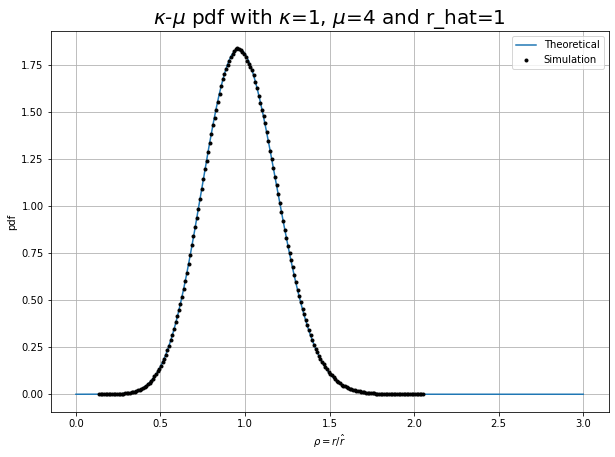

In [4]:
ku = KappaMu(kappa, mu, r_hat, numSamples, numSim) # instantiate KappaMu object
X = ku.X
Y = ku.Y
n = len(X)

# Plotting
print(f'====== {numSamples} kappa-mu samples succesfully generated! ======')
r = np.linspace(0, 3, 3000)# theoretical envelope PDF x axes
plt.figure(figsize=((10,7)))
plt.plot(r, ku._pdf(r), label='Theoretical')
plt.plot(ku.X, ku.Y, "k.", label='Simulation')
plt.title(r'$\kappa$-$\mu$ pdf with $\kappa$={}, $\mu$={} and r_hat={}'.format(kappa,mu,r_hat), fontsize=20)
plt.legend()
plt.grid(True)
plt.xlabel(r'$\rho=r/\hat{r}$')
plt.ylabel('pdf')
plt.show()

In [5]:
## Auxiliary Methods
def computePDF(r, kappa, mu, r_hat):
  '''
  Function to calculate kappa-mu pdf.
  Equation extracted from:
  https://www.fee.unicamp.br/sites/default/files/docentes/michel/the_kappa-mu_distribution_and_the_eta-mu_distribution.pdf
  Eq. (1) with rho = R = r / r_hat
  '''

  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /((kappa**((mu - 1)/2)) * np.exp(mu * kappa))
  R = r / r_hat
  B = (R**mu) * np.exp(- mu*(1 + kappa)*(R**2))
  C = sp.iv(mu - 1, 2*mu * R * np.sqrt(kappa*(1 + kappa)))
  PDF = A * B * C / r_hat 
  return PDF

def fitness(x,y,z):
  '''
  Fitness function (MSE) to determine how good a given solution is.
  '''
  global X
  global Y
  y_pred = computePDF(X, x, y, z)
  cost = 1/n * sum(val**2 for val in (Y-y_pred))
  return 1/cost

## Instantiate KappaMu object 
ku = KappaMu(kappa, mu, r_hat, numSamples, numSim) 
X = ku.X
Y = ku.Y
n = len(X)

## Set up directories
paths = ['plots', 
            'plots/gen/', 
        ]
for i in paths:
    if not os.path.exists(i):
        os.makedirs(i)

=== Generation: 0 === 
Fitness: 74.20686640721418
Best individual:
Kappa: 1.7406328832517648
Mu: 2.9977796754606554
R_hat: 1.0434816378942853



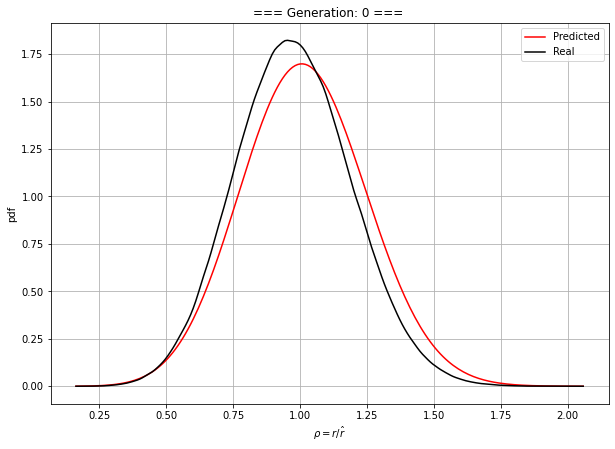

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 1 === 
Fitness: 67.70031366946412
Best individual:
Kappa: 0.1057097640408418
Mu: 4.164147979692942
R_hat: 1.047551887860949



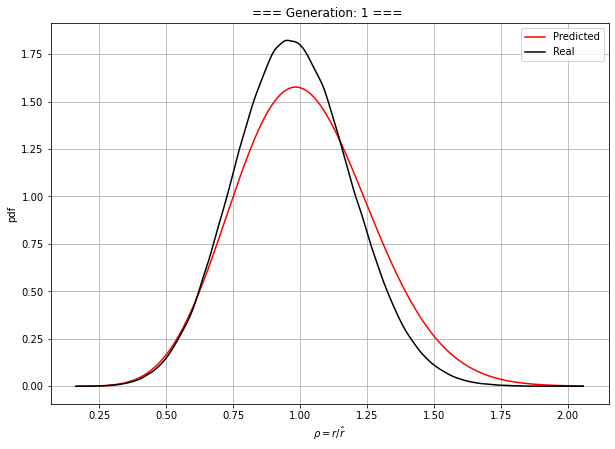

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 2 === 
Fitness: 155.409887898158
Best individual:
Kappa: 4.1535177422940475
Mu: 1.5577992851061975
R_hat: 1.012306685543846



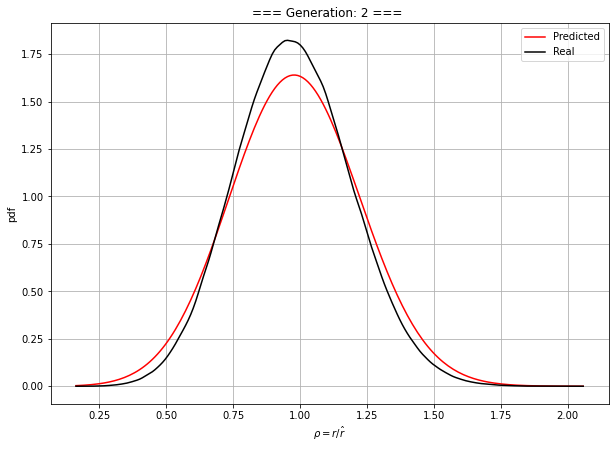

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 3 === 
Fitness: 36.50988030132642
Best individual:
Kappa: 1.2232355113623752
Mu: 2.8685722106769735
R_hat: 1.059677772030405



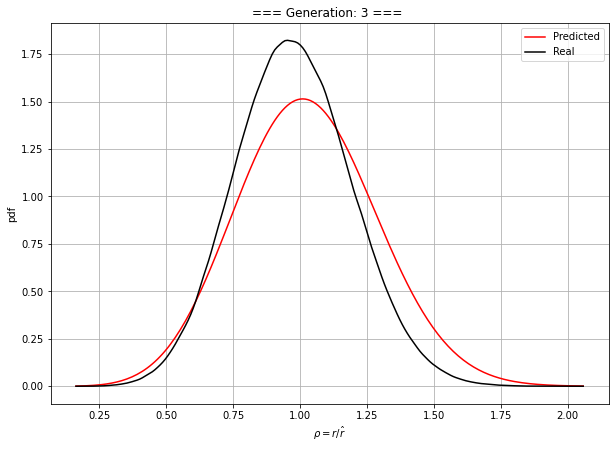

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 4 === 
Fitness: nan
Best individual:
Kappa: 1.4211568351190471
Mu: 9.802969226150148
R_hat: 0.08492807496668563



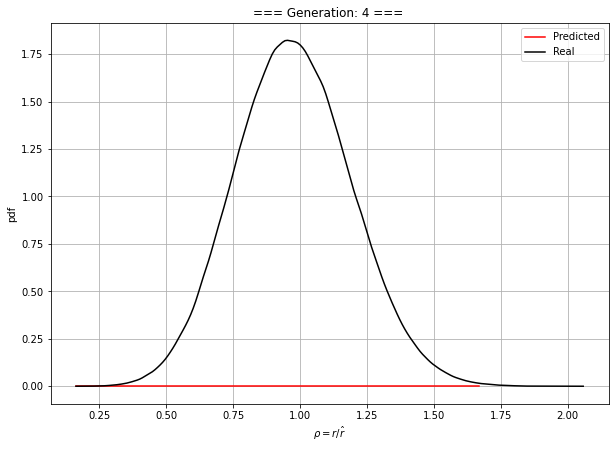

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 5 === 
Fitness: 60.02550002027909
Best individual:
Kappa: 1.1346522468563898
Mu: 2.8510026485314675
R_hat: 1.0325338335857184



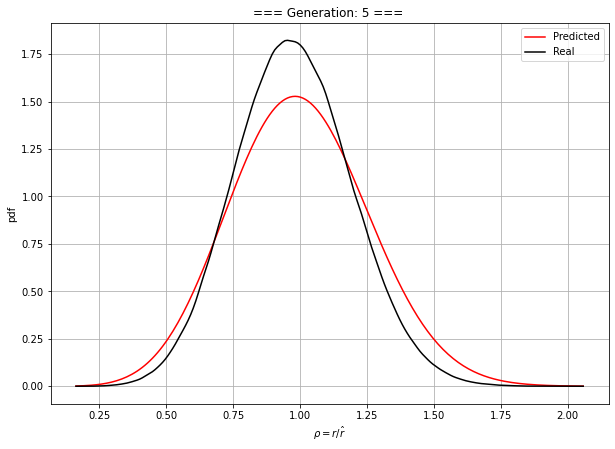

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 6 === 
Fitness: 48.47606128094053
Best individual:
Kappa: 9.840232465677106
Mu: 1.117692906841534
R_hat: 0.9529932579225804



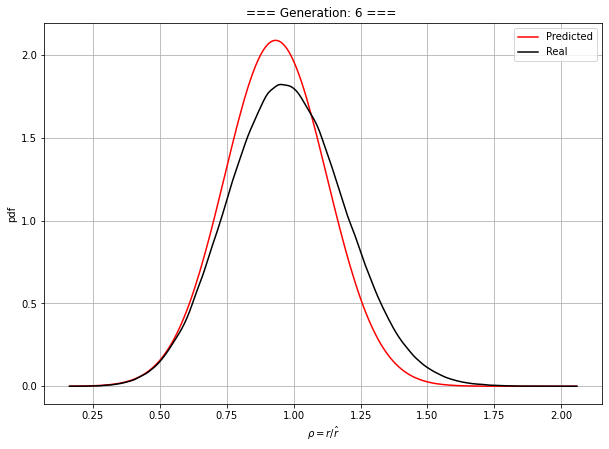

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 7 === 
Fitness: 72.1323017210909
Best individual:
Kappa: 1.0803149588890024
Mu: 2.816410815246797
R_hat: 0.9927504120598778



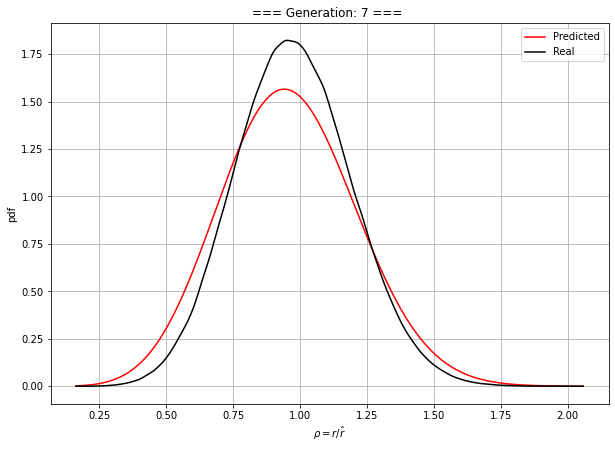

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


=== Generation: 8 === 
Fitness: nan
Best individual:
Kappa: 4.837106042452248
Mu: 5.953197955325373
R_hat: 0.0825009432457093



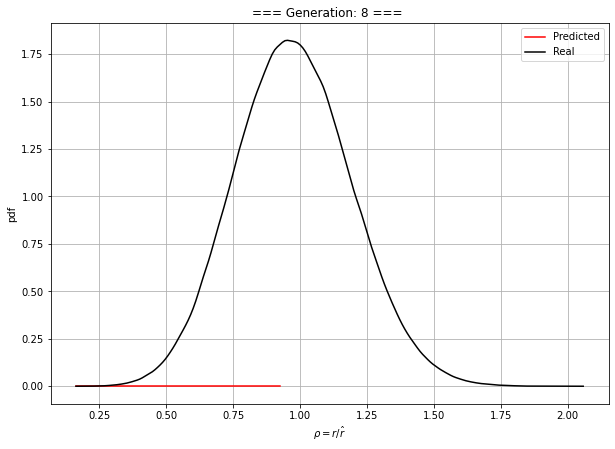

=== Generation: 9 === 
Fitness: 151.3144240409719
Best individual:
Kappa: 8.289220380062444
Mu: 1.0179015665790603
R_hat: 1.0238506116891415



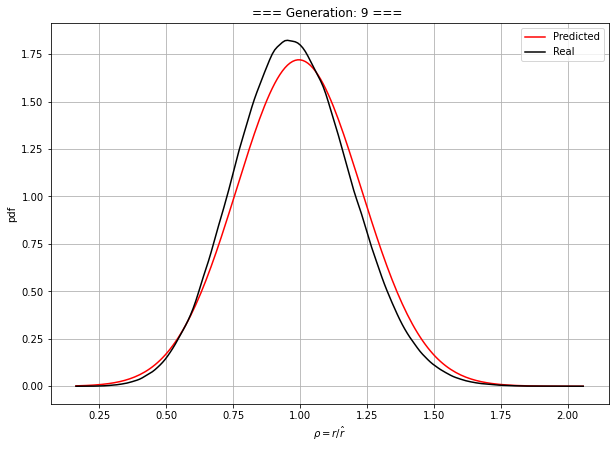

=== Generation: 10 === 
Fitness: 4690.637828606261
Best individual:
Kappa: 9.032314449575594
Mu: 0.998085515944705
R_hat: 0.9940768270268617



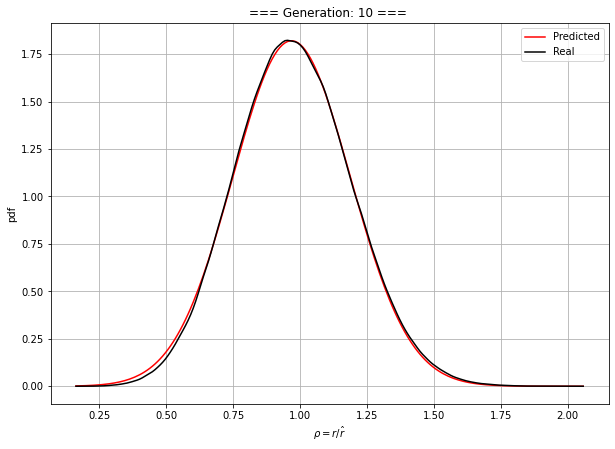

=== Generation: 11 === 
Fitness: 208.51306991334937
Best individual:
Kappa: 6.5502989017112485
Mu: 1.1177072937855366
R_hat: 1.0061917611264093



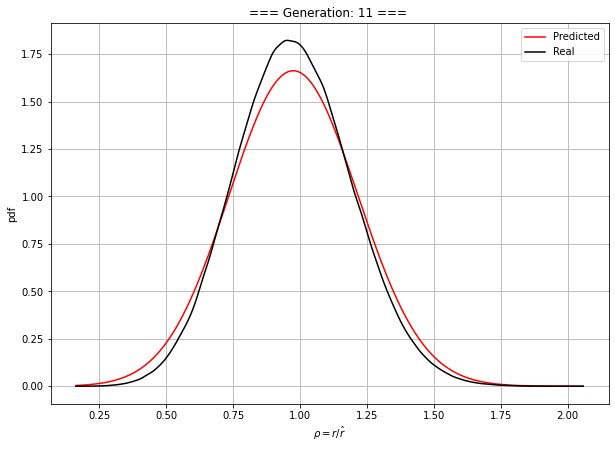

=== Generation: 12 === 
Fitness: 1411.6525696076985
Best individual:
Kappa: 8.369722096450065
Mu: 1.0154787163392838
R_hat: 0.9971363975562161



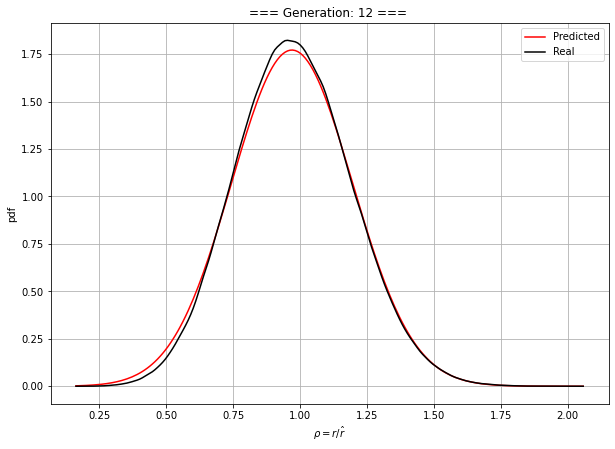

=== Generation: 13 === 
Fitness: 1061.4503529734593
Best individual:
Kappa: 8.285035926905893
Mu: 1.0311157780724673
R_hat: 1.001681869987189



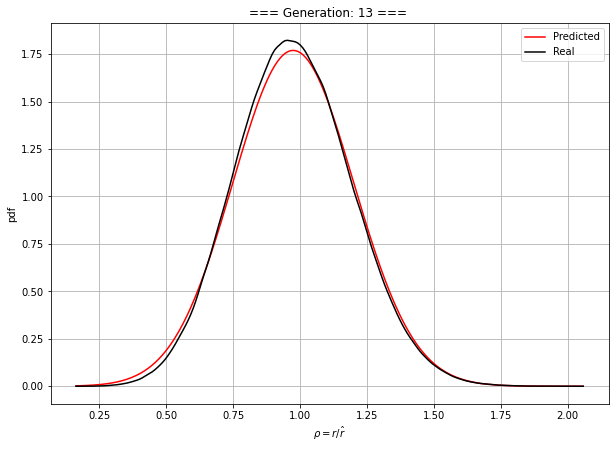

=== Generation: 14 === 
Fitness: 1326.7396898008888
Best individual:
Kappa: 8.54659324136046
Mu: 1.0152620464490316
R_hat: 1.001120624440773



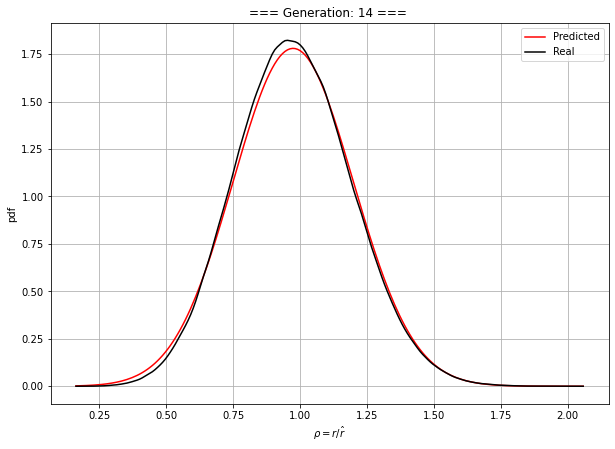

=== Generation: 15 === 
Fitness: 3249.5651778008455
Best individual:
Kappa: 8.590525202396408
Mu: 1.0255613968719288
R_hat: 0.9961040542653818



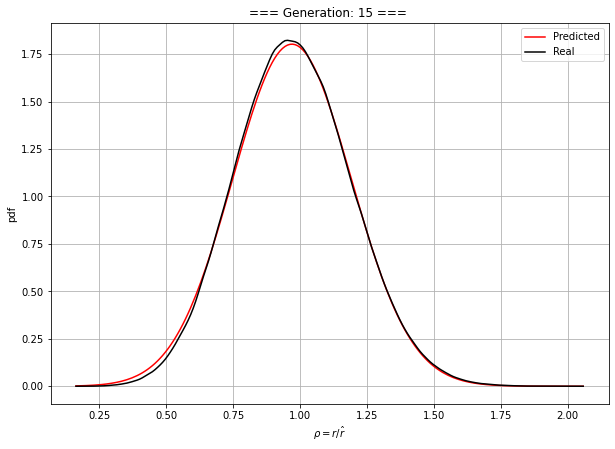

=== Generation: 16 === 
Fitness: 3667.8854799094865
Best individual:
Kappa: 8.330582303328129
Mu: 1.0596556240993118
R_hat: 0.9964548255235773



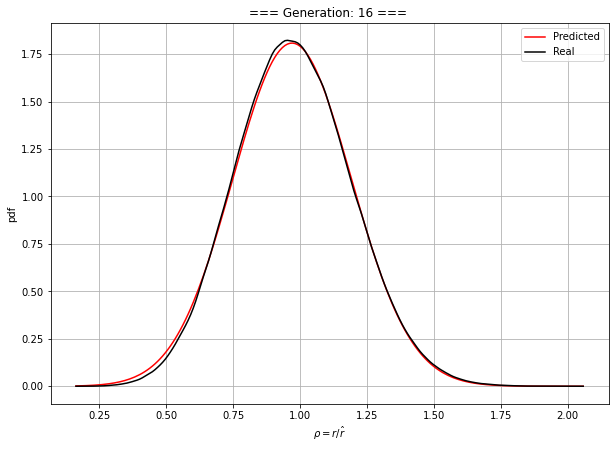

=== Generation: 17 === 
Fitness: 2317.3477089902563
Best individual:
Kappa: 8.51936653358962
Mu: 1.019324250516825
R_hat: 0.9917958989950089



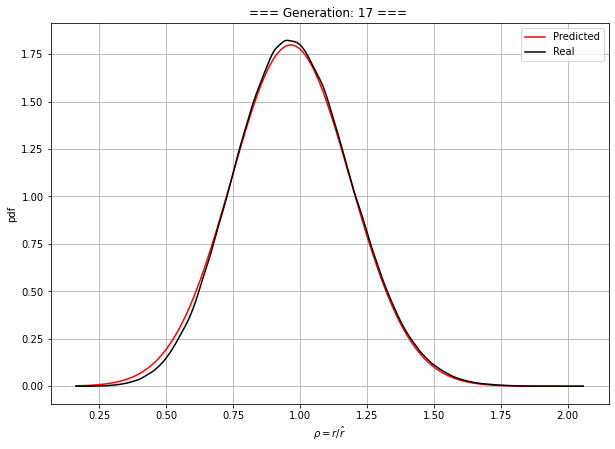

=== Generation: 18 === 
Fitness: 2269.2879934096354
Best individual:
Kappa: 8.368853243739064
Mu: 1.03186116190717
R_hat: 0.9925459507563362



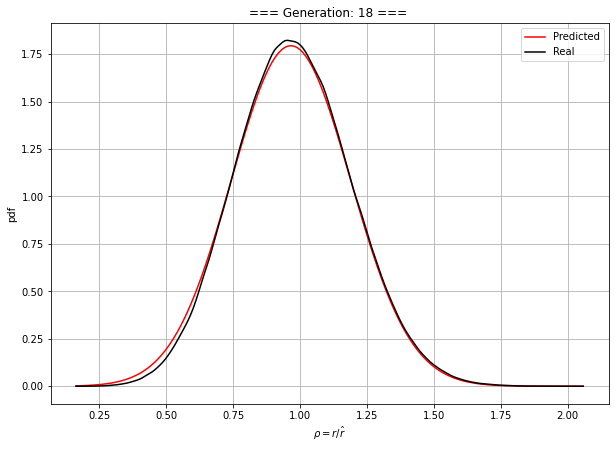

=== Generation: 19 === 
Fitness: 1650.4950465739475
Best individual:
Kappa: 8.342723990279099
Mu: 1.022064367652698
R_hat: 0.9920929355598802



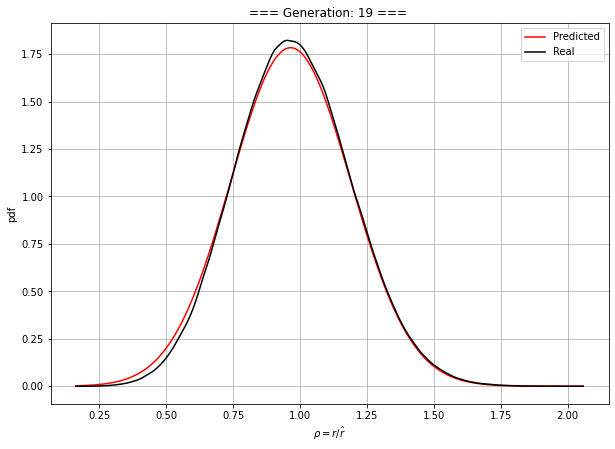

=== Generation: 20 === 
Fitness: 1661.627509146287
Best individual:
Kappa: 9.635810810657107
Mu: 0.9974619106351754
R_hat: 0.9910499525663617



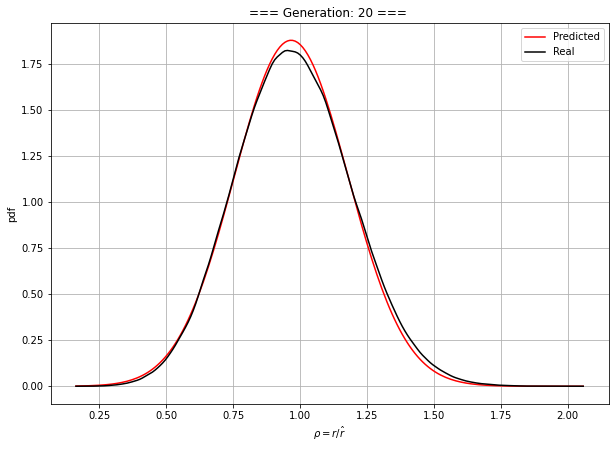

=== Generation: 21 === 
Fitness: 285.21396590584914
Best individual:
Kappa: 0.9880846799708992
Mu: 4.653055982423181
R_hat: 0.9992541024688655



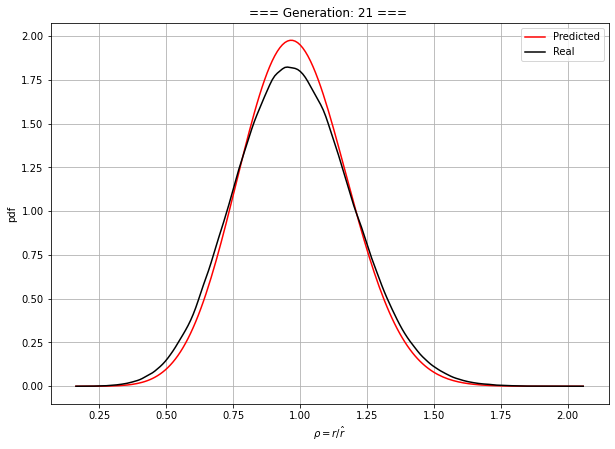

=== Generation: 22 === 
Fitness: 235.20501582117308
Best individual:
Kappa: 2.8928340622218784
Mu: 2.8176618608622093
R_hat: 0.9971141849054957



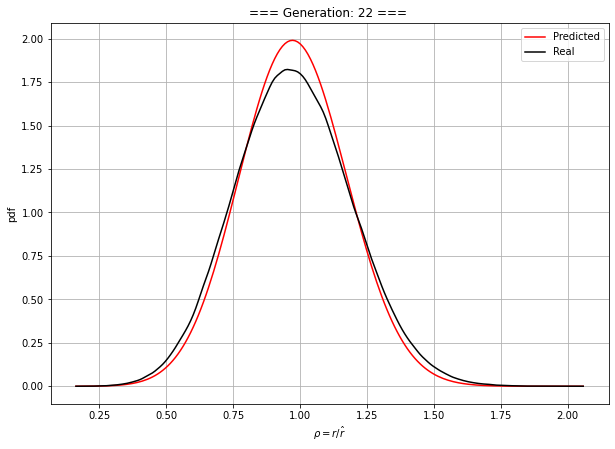

=== Generation: 23 === 
Fitness: 246.76598233246443
Best individual:
Kappa: 2.918293481543995
Mu: 2.790798207587635
R_hat: 0.9978631870608244



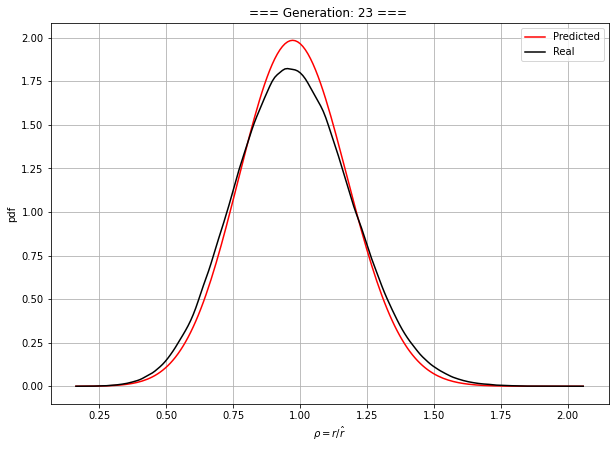

=== Generation: 24 === 
Fitness: 235.95427092846504
Best individual:
Kappa: 2.857143041581528
Mu: 2.8263881072726083
R_hat: 1.002830937706842



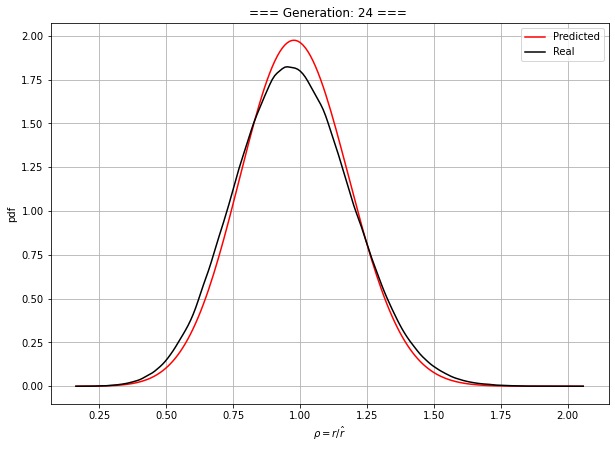

=== Generation: 25 === 
Fitness: 295.47732267536975
Best individual:
Kappa: 2.8938498577372176
Mu: 2.762895484967258
R_hat: 0.9949109410005277



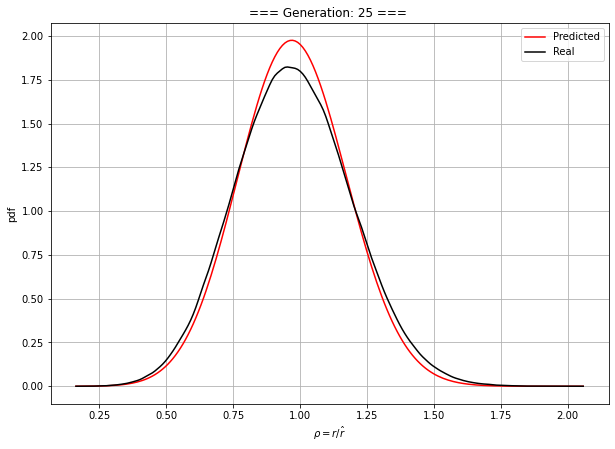

=== Generation: 26 === 
Fitness: 392.48392124955643
Best individual:
Kappa: 2.785001215177983
Mu: 2.7598734753869474
R_hat: 1.0028457590242486



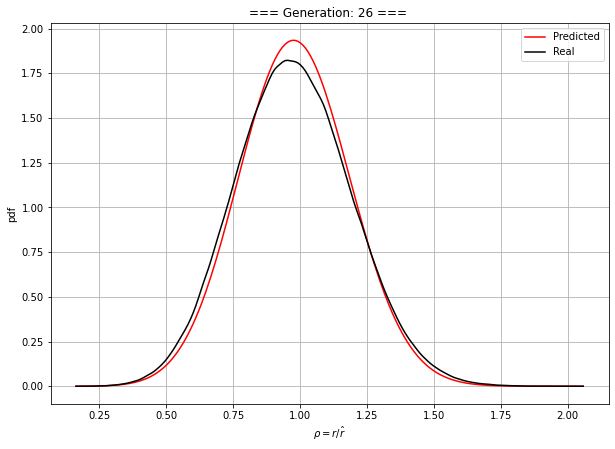

=== Generation: 27 === 
Fitness: 380.56628959695
Best individual:
Kappa: 2.8030508072117857
Mu: 2.7674056481056697
R_hat: 0.9946775564063982



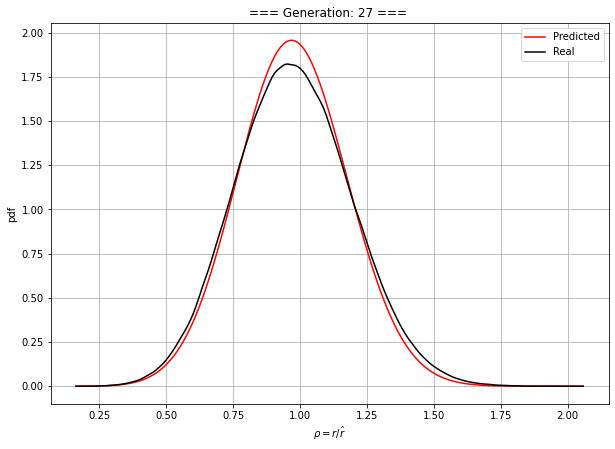

=== Generation: 28 === 
Fitness: 460.2124979211021
Best individual:
Kappa: 2.752019063821934
Mu: 2.7681669383396827
R_hat: 0.998805465715383



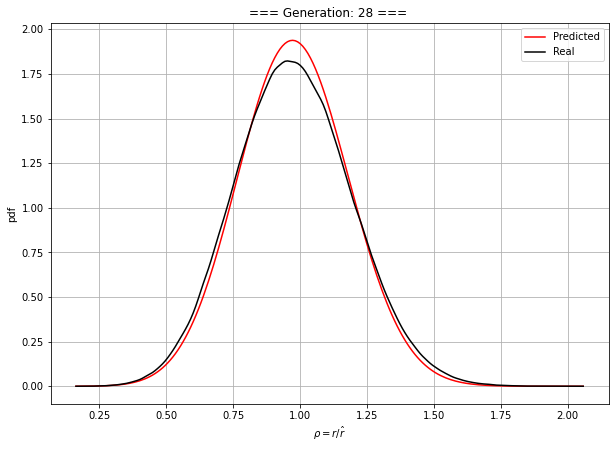

=== Generation: 29 === 
Fitness: 481.99671278626795
Best individual:
Kappa: 2.7389199995880458
Mu: 2.76728337705461
R_hat: 0.9993886246464065



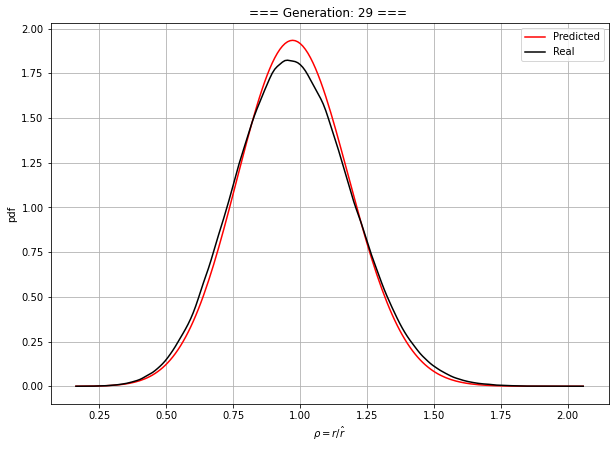

=== Generation: 30 === 
Fitness: 561.6051831767777
Best individual:
Kappa: 2.743888141147708
Mu: 2.739517930462282
R_hat: 0.9952991667951595



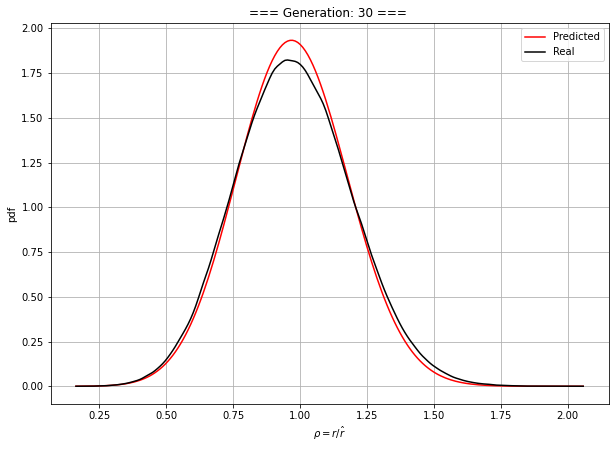

=== Generation: 31 === 
Fitness: 793.4869081304232
Best individual:
Kappa: 2.7351203233752437
Mu: 2.6988937635422805
R_hat: 0.9974921145845437



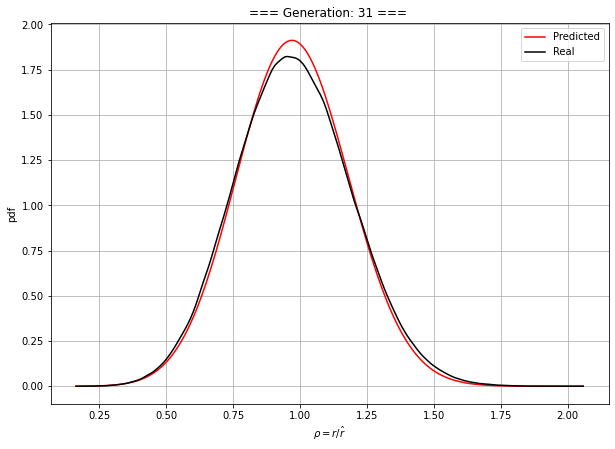

=== Generation: 32 === 
Fitness: 819.1537167190834
Best individual:
Kappa: 2.7851739733109073
Mu: 2.6566678365644942
R_hat: 1.0003192520364732



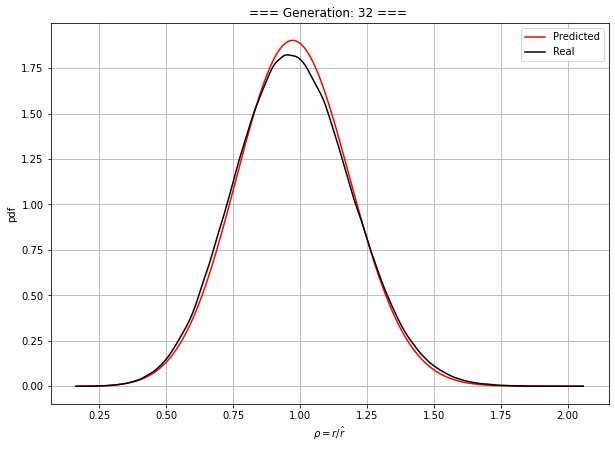

=== Generation: 33 === 
Fitness: 844.6081526406518
Best individual:
Kappa: 2.767005125727632
Mu: 2.6713603712531455
R_hat: 0.9965924953482398



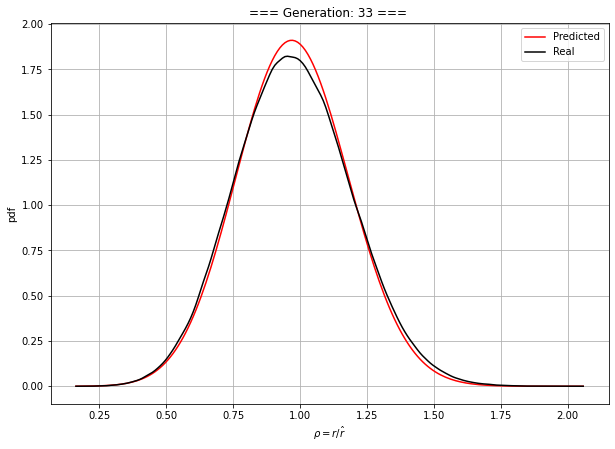

=== Generation: 34 === 
Fitness: 1109.6528173426311
Best individual:
Kappa: 2.689132514686535
Mu: 2.685292745413609
R_hat: 0.9986544437253622



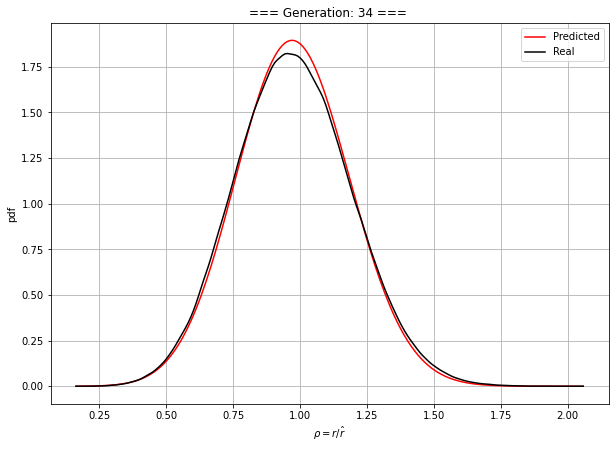

=== Generation: 35 === 
Fitness: 1085.7805164477847
Best individual:
Kappa: 2.7383065895345484
Mu: 2.657669271704475
R_hat: 0.995700798706265



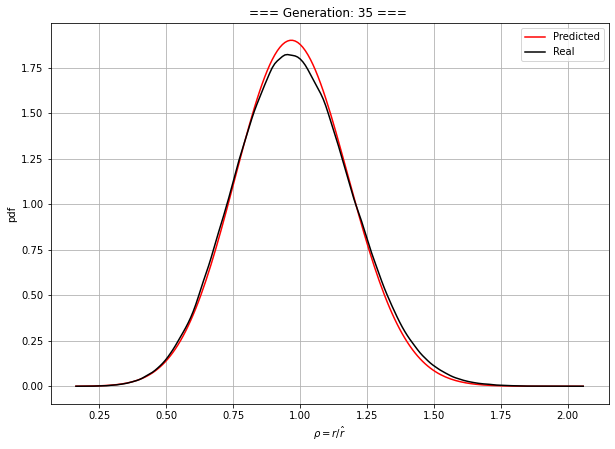

=== Generation: 36 === 
Fitness: 1786.9304362206303
Best individual:
Kappa: 2.6669236164348233
Mu: 2.653806454311253
R_hat: 0.9969182396224338



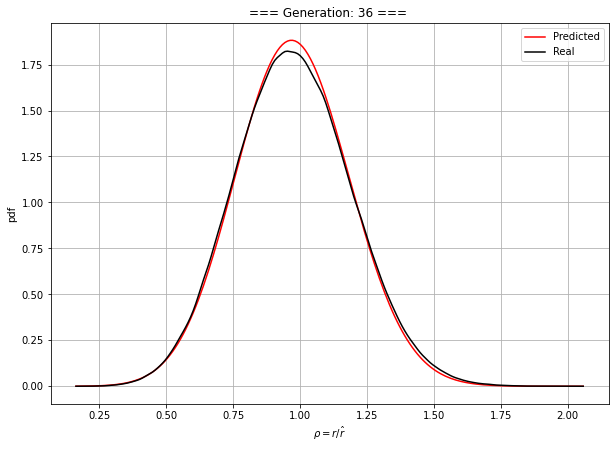

=== Generation: 37 === 
Fitness: 2039.4721852435616
Best individual:
Kappa: 2.628563208743388
Mu: 2.6644881983472986
R_hat: 0.9983066428219203



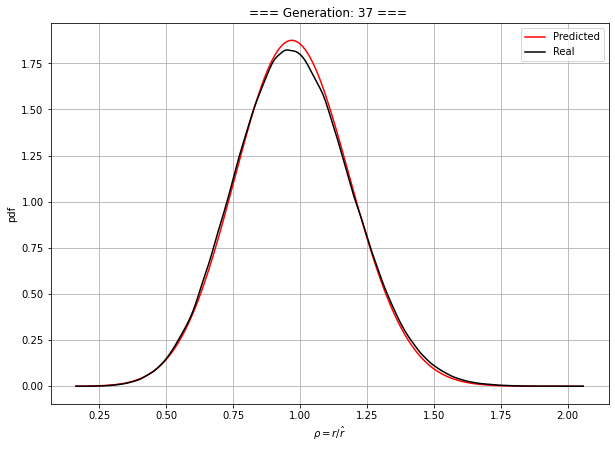

=== Generation: 38 === 
Fitness: 2734.6222610930236
Best individual:
Kappa: 2.6651769905721627
Mu: 2.6171554656161726
R_hat: 0.9985634623362513



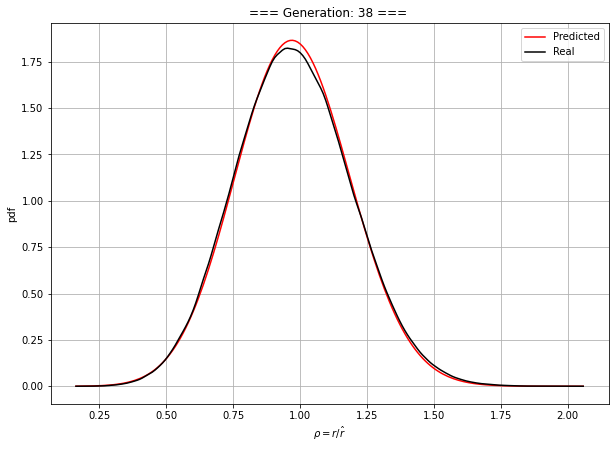

=== Generation: 39 === 
Fitness: 3009.996990696293
Best individual:
Kappa: 2.6264305388780493
Mu: 2.6048713181796925
R_hat: 1.0012608601848876



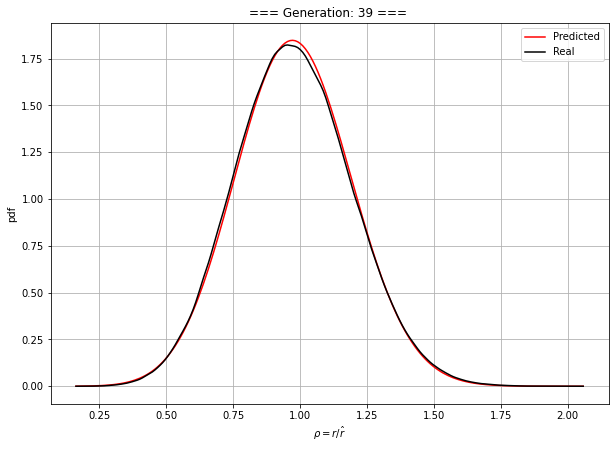

=== Generation: 40 === 
Fitness: 3088.0046919053616
Best individual:
Kappa: 2.6064697007586277
Mu: 2.630849332595883
R_hat: 0.9939581790138754



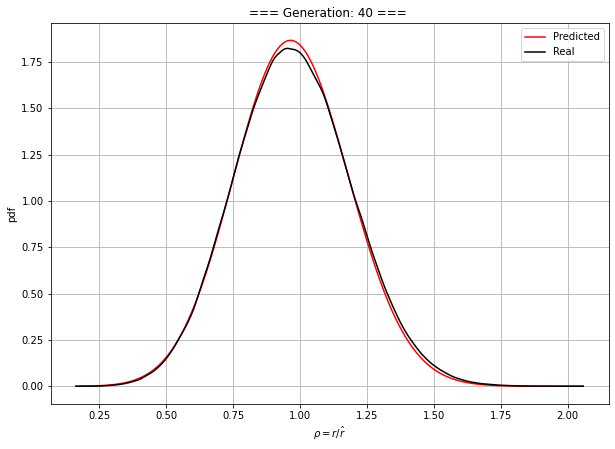

=== Generation: 41 === 
Fitness: 4705.001798166126
Best individual:
Kappa: 2.618485211603687
Mu: 2.60738652304621
R_hat: 0.9985863388193452



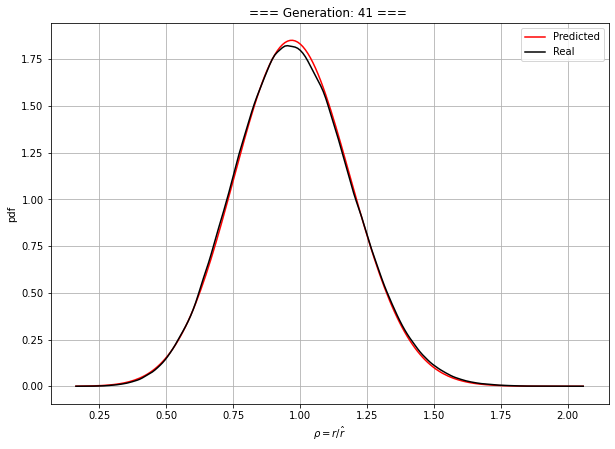

=== Generation: 42 === 
Fitness: 4414.682649532745
Best individual:
Kappa: 2.58237434124413
Mu: 2.6389530794683704
R_hat: 0.9973354066780359



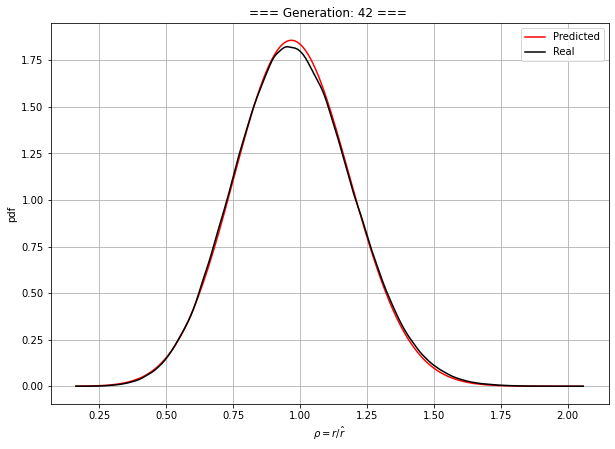

=== Generation: 43 === 
Fitness: 5359.45937424932
Best individual:
Kappa: 2.6546821402284784
Mu: 2.582183738167189
R_hat: 0.9973765795105151



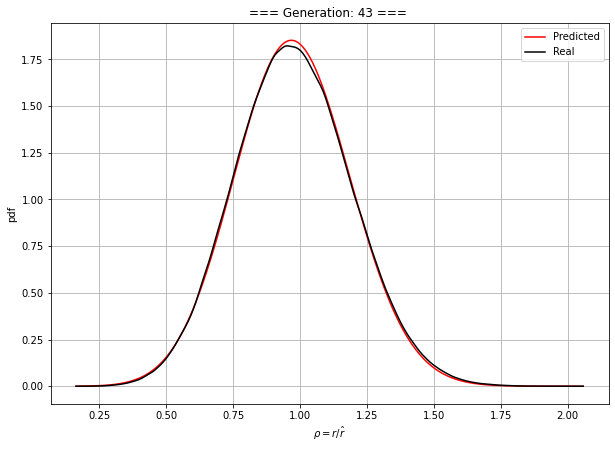

=== Generation: 44 === 
Fitness: 12969.892411915129
Best individual:
Kappa: 2.5719637379403606
Mu: 2.5753931082142962
R_hat: 0.9973455816872001



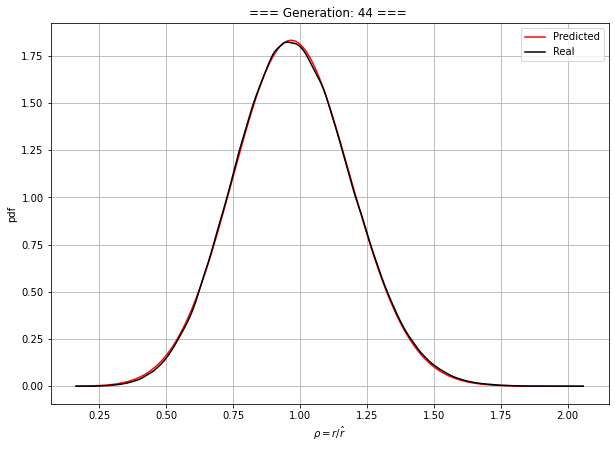

=== Generation: 45 === 
Fitness: 6618.004059796573
Best individual:
Kappa: 2.6480636968643863
Mu: 2.5510954455391945
R_hat: 0.9943589705693197



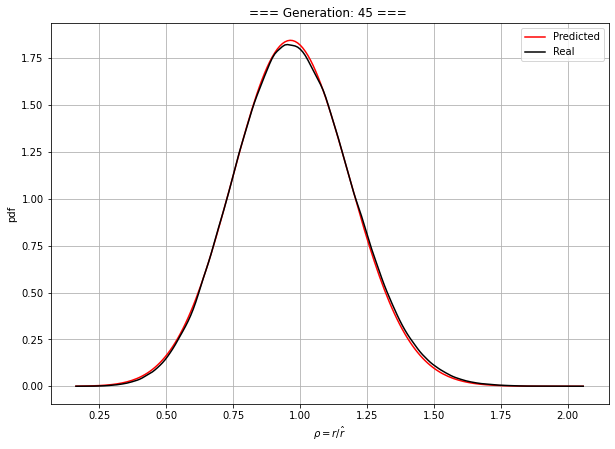

=== Generation: 46 === 
Fitness: 8232.607160046788
Best individual:
Kappa: 2.6034132795658813
Mu: 2.584203257152209
R_hat: 0.9958909022320428



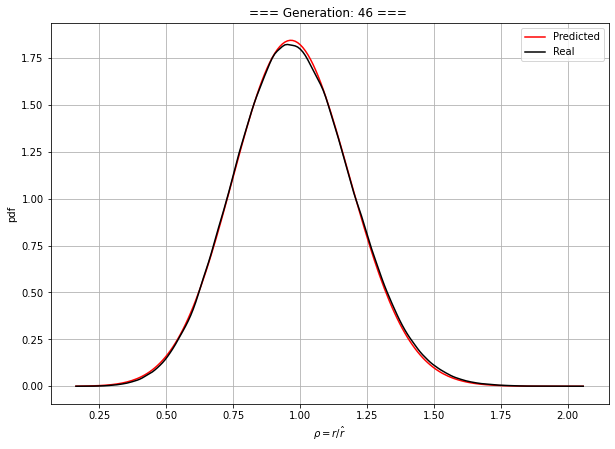

=== Generation: 47 === 
Fitness: 7704.3559649623385
Best individual:
Kappa: 2.635251935704996
Mu: 2.5709459371797254
R_hat: 0.9977554287588384



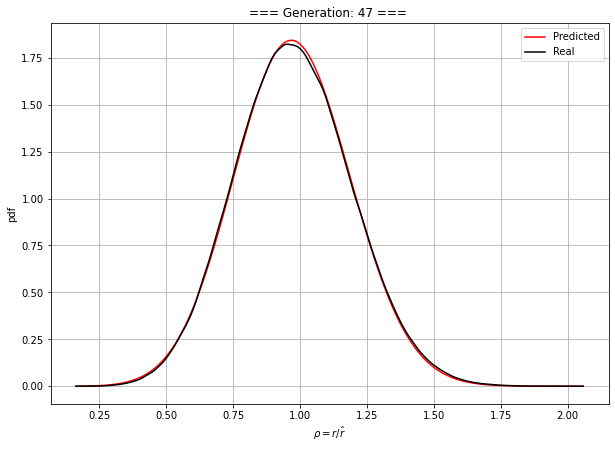

=== Generation: 48 === 
Fitness: 12106.158101572408
Best individual:
Kappa: 2.5711576045096627
Mu: 2.544648092132608
R_hat: 0.9978793659335252



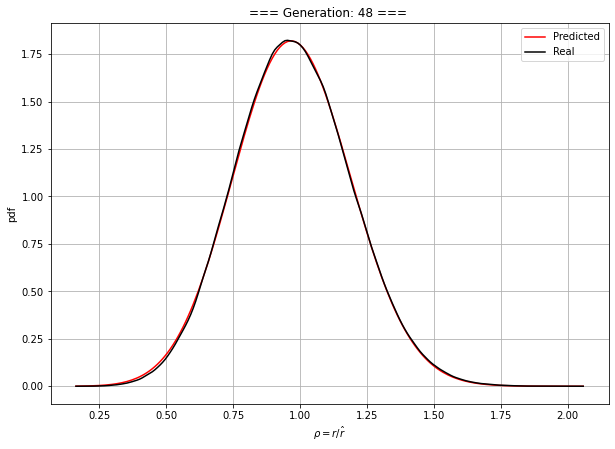

=== Generation: 49 === 
Fitness: 12299.562911925554
Best individual:
Kappa: 2.583610724007779
Mu: 2.5640804071665726
R_hat: 0.9979618020299862



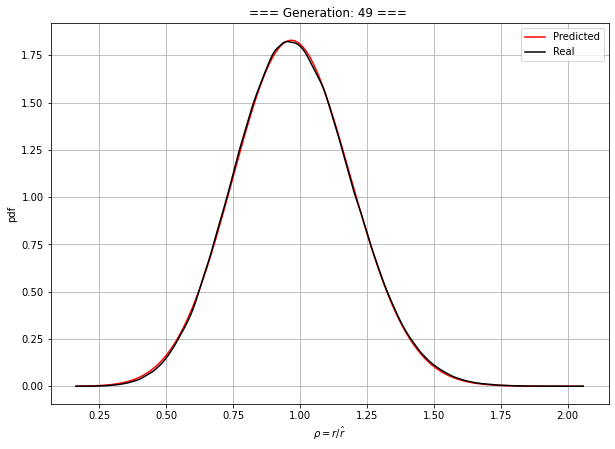

=== Generation: 50 === 
Fitness: 13046.216704214
Best individual:
Kappa: 2.6082457762853037
Mu: 2.5520380500486683
R_hat: 0.9969947483769224



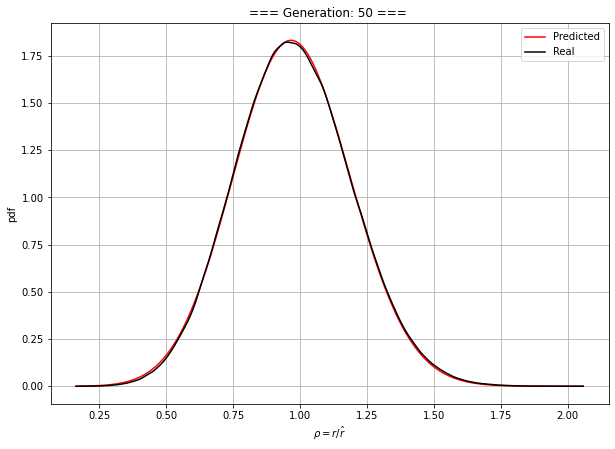

=== Generation: 51 === 
Fitness: 12258.44836806248
Best individual:
Kappa: 2.6074188473358473
Mu: 2.520401894219425
R_hat: 0.9963819359391116



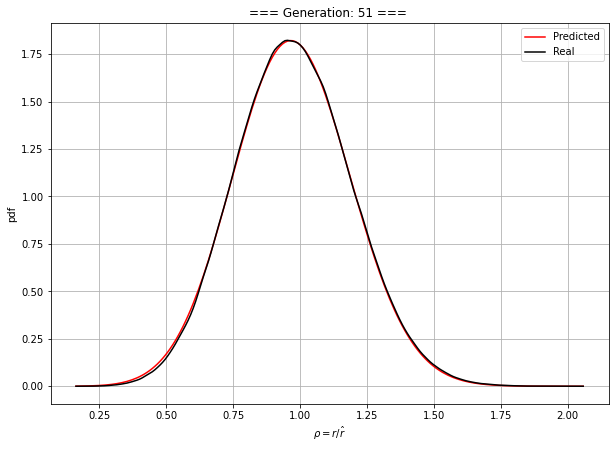

=== Generation: 52 === 
Fitness: 11014.536181370464
Best individual:
Kappa: 2.6347531322313134
Mu: 2.544947534345281
R_hat: 0.9978577410145275



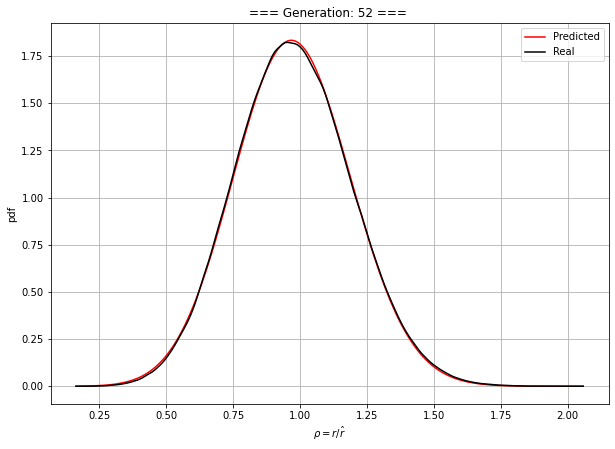

=== Generation: 53 === 
Fitness: 13556.193977315168
Best individual:
Kappa: 2.6133586072363797
Mu: 2.5418803292022423
R_hat: 0.9967812090943252



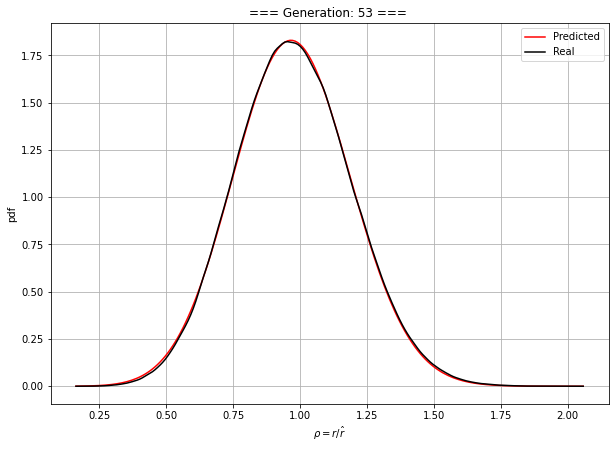

=== Generation: 54 === 
Fitness: 13873.453669990537
Best individual:
Kappa: 2.573800907691201
Mu: 2.5617614166681175
R_hat: 0.9966008061582239



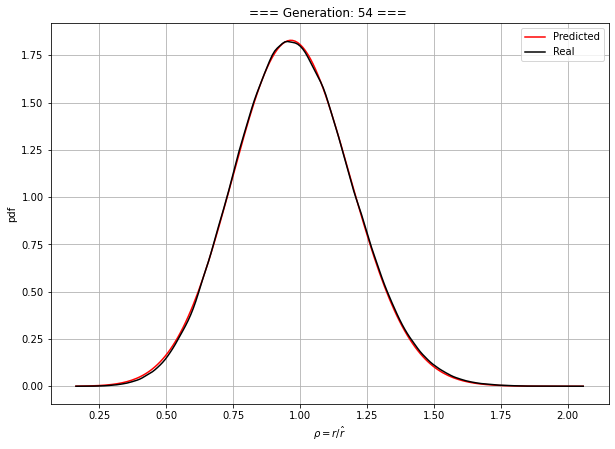

=== Generation: 55 === 
Fitness: 13422.745132461068
Best individual:
Kappa: 2.558245965248357
Mu: 2.5819983871679306
R_hat: 0.996998219100036



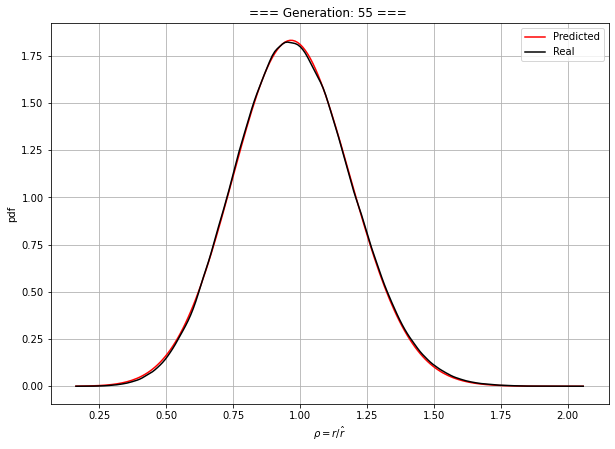

=== Generation: 56 === 
Fitness: 12158.188592356199
Best individual:
Kappa: 2.610055509950394
Mu: 2.538743280245944
R_hat: 0.9957481224603305



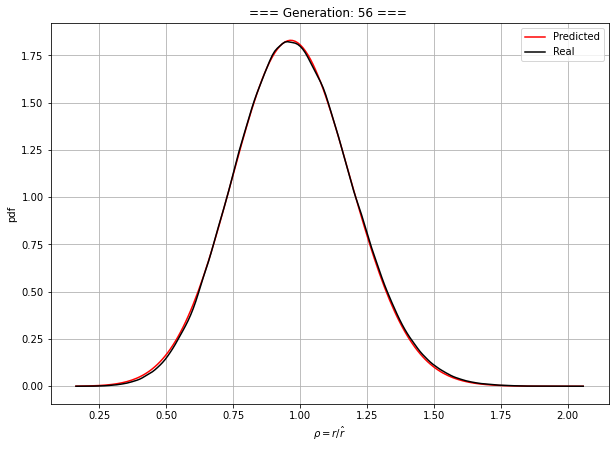

=== Generation: 57 === 
Fitness: 13096.934127769056
Best individual:
Kappa: 2.581874116116423
Mu: 2.553302973145222
R_hat: 0.997781664808891



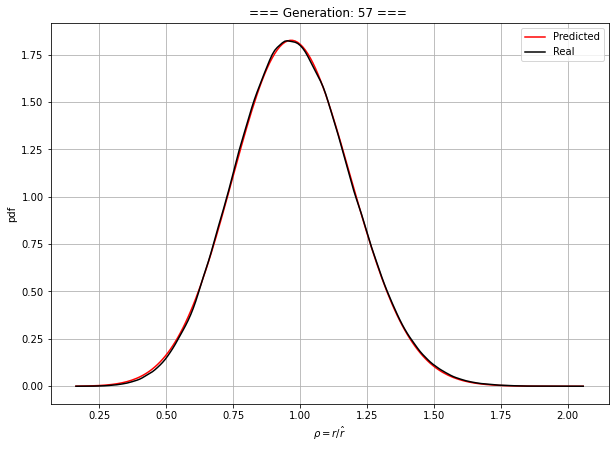

=== Generation: 58 === 
Fitness: 12603.542234820563
Best individual:
Kappa: 2.3994453660876918
Mu: 2.655531187825349
R_hat: 0.9957832810144689



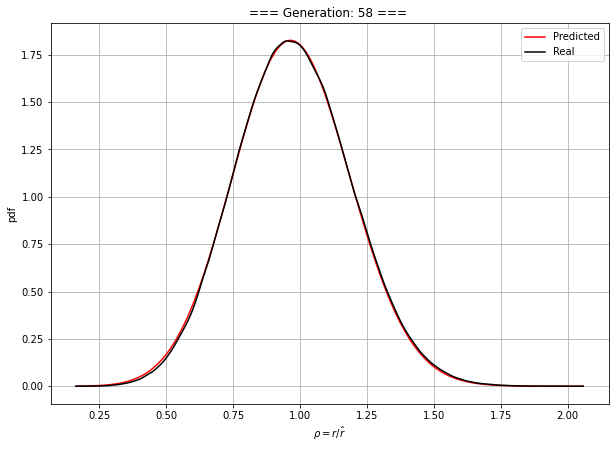

=== Generation: 59 === 
Fitness: 13444.911386971626
Best individual:
Kappa: 2.538779290803742
Mu: 2.591805547613433
R_hat: 0.996507705197536



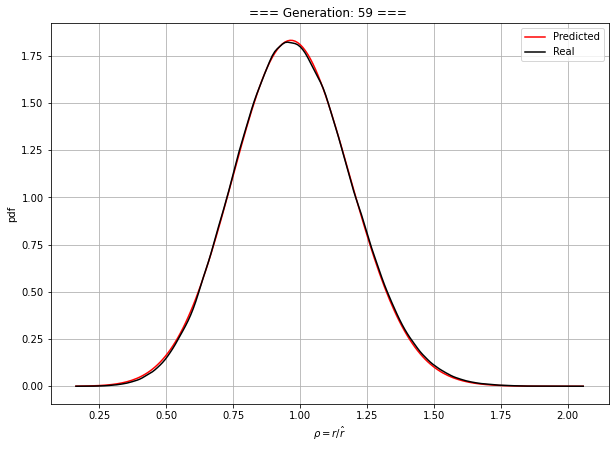

=== Generation: 60 === 
Fitness: 13266.243897680506
Best individual:
Kappa: 2.4495320710327
Mu: 2.6133029671641377
R_hat: 0.9970177675211583



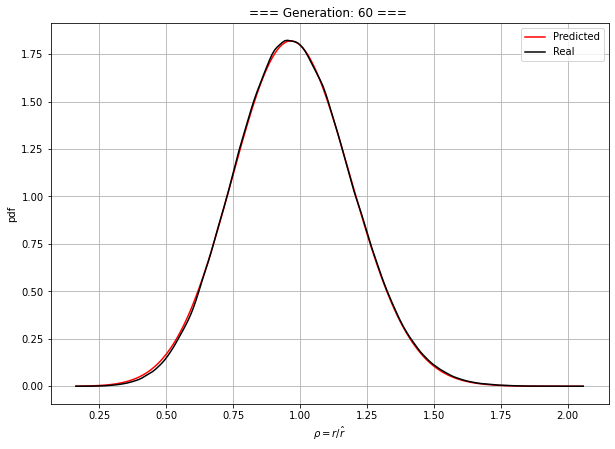

=== Generation: 61 === 
Fitness: 12950.471070830628
Best individual:
Kappa: 2.6101584532077977
Mu: 2.5425173576805316
R_hat: 0.9961662631699556



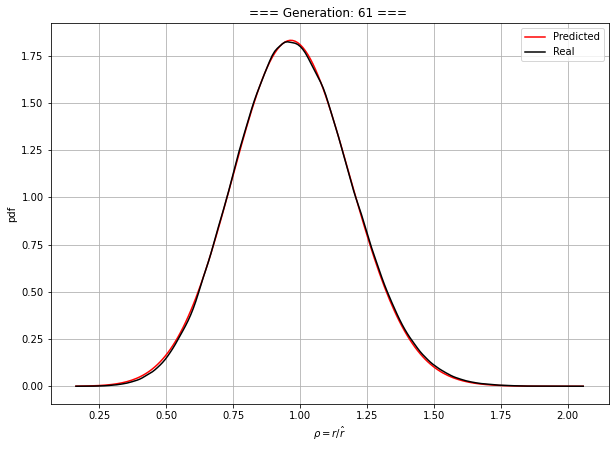

=== Generation: 62 === 
Fitness: 15097.799082665058
Best individual:
Kappa: 2.4452569359502108
Mu: 2.643610825702614
R_hat: 0.9972769637565707



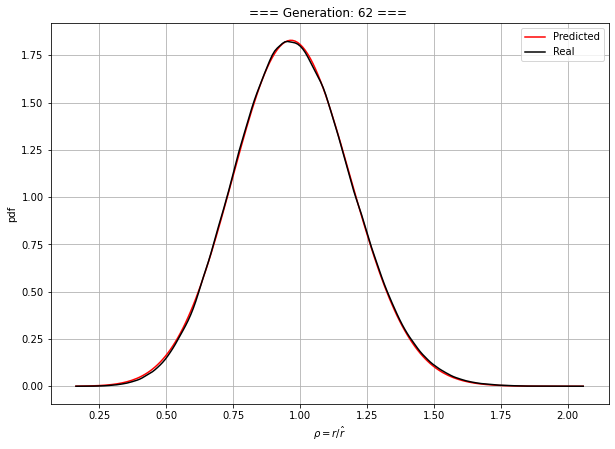

=== Generation: 63 === 
Fitness: 13916.190838024037
Best individual:
Kappa: 2.536847942864623
Mu: 2.587635480342463
R_hat: 0.9974709635416821



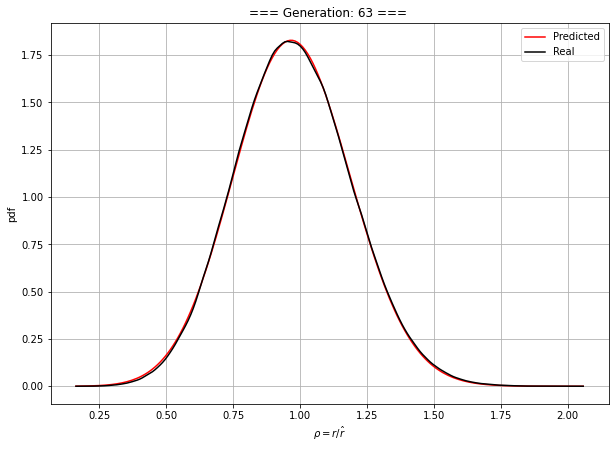

=== Generation: 64 === 
Fitness: 14132.33634265068
Best individual:
Kappa: 2.5324812673583734
Mu: 2.581250191221285
R_hat: 0.9974485935235372



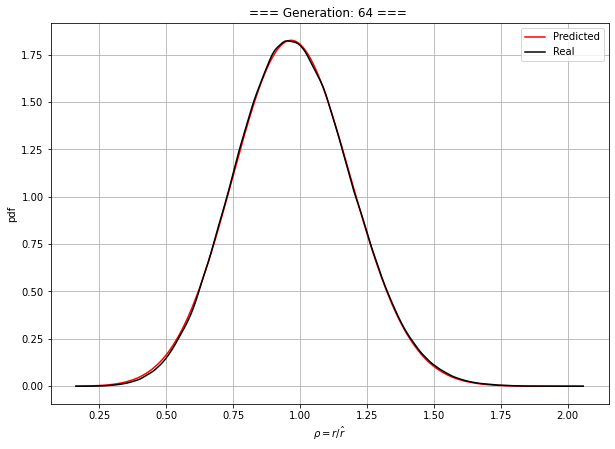

=== Generation: 65 === 
Fitness: 12392.712787251283
Best individual:
Kappa: 2.4651935465899455
Mu: 2.598966319672947
R_hat: 0.9971530062559522



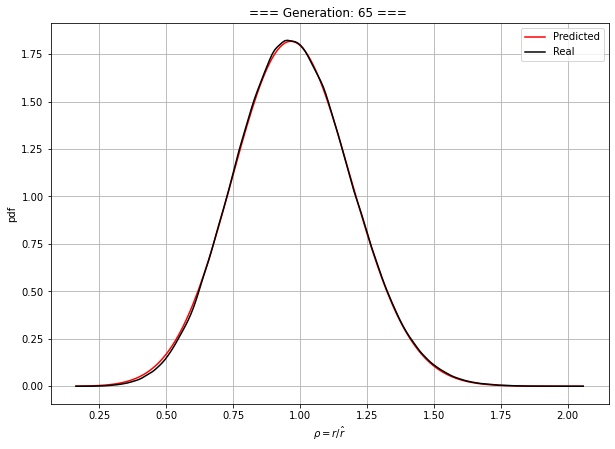

=== Generation: 66 === 
Fitness: 13733.016043595011
Best individual:
Kappa: 2.551057127044195
Mu: 2.583131310960895
R_hat: 0.997214809724941



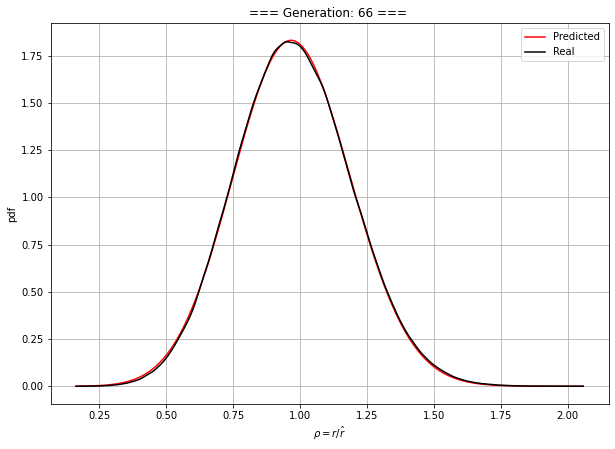

=== Generation: 67 === 
Fitness: 13584.925827494042
Best individual:
Kappa: 2.57985296596538
Mu: 2.5515233898881924
R_hat: 0.997482572462013



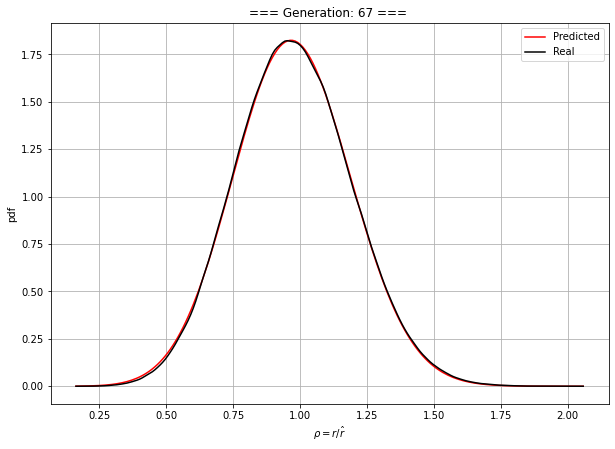

=== Generation: 68 === 
Fitness: 13727.306287653979
Best individual:
Kappa: 2.574928128599416
Mu: 2.567193634641712
R_hat: 0.9969662052122118



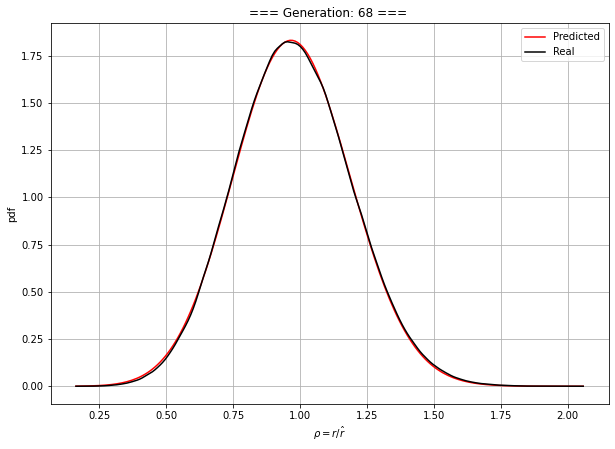

=== Generation: 69 === 
Fitness: 12226.309071830425
Best individual:
Kappa: 2.528673421372872
Mu: 2.6034342863293016
R_hat: 0.9979748402708647



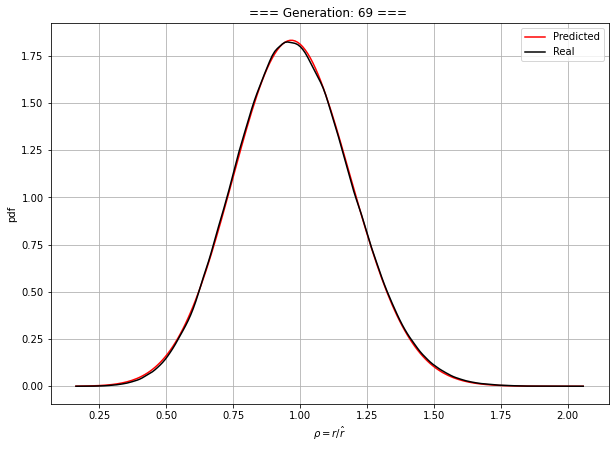

=== Generation: 70 === 
Fitness: 13811.150941128582
Best individual:
Kappa: 2.5486131786835173
Mu: 2.572628203212854
R_hat: 0.996388157002351



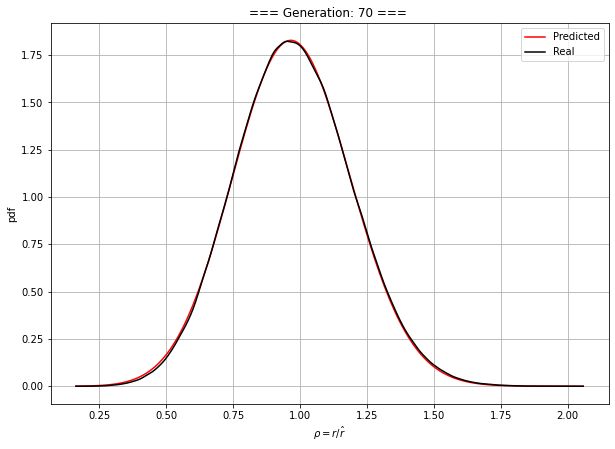

=== Generation: 71 === 
Fitness: 14855.16443725118
Best individual:
Kappa: 2.448538527440648
Mu: 2.6324289540132355
R_hat: 0.9975699401008938



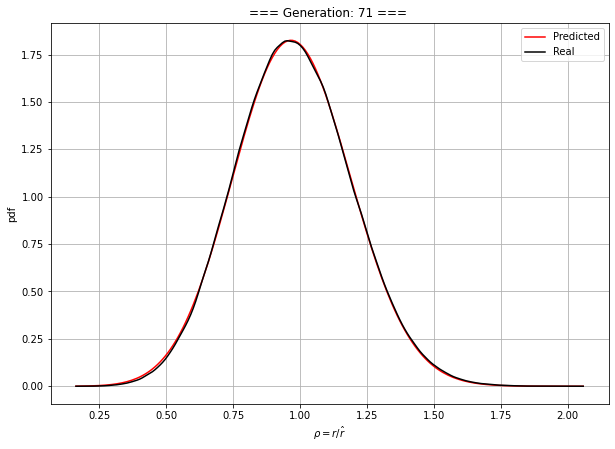

=== Generation: 72 === 
Fitness: 13404.936963621787
Best individual:
Kappa: 2.5313187722100676
Mu: 2.568426505089149
R_hat: 0.9968791281839194



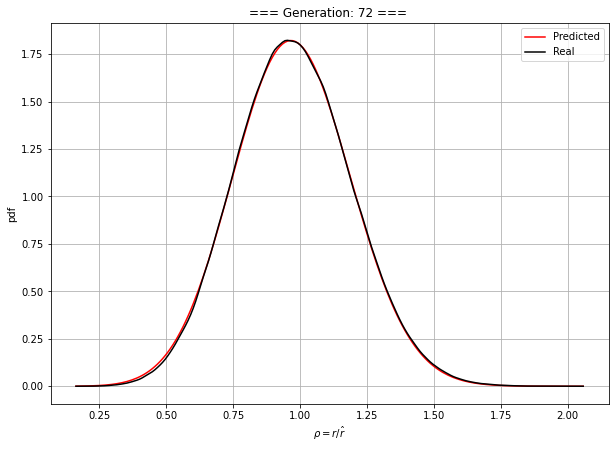

=== Generation: 73 === 
Fitness: 13838.866583231007
Best individual:
Kappa: 2.6032267426827316
Mu: 2.542472973194561
R_hat: 0.9969203169291012



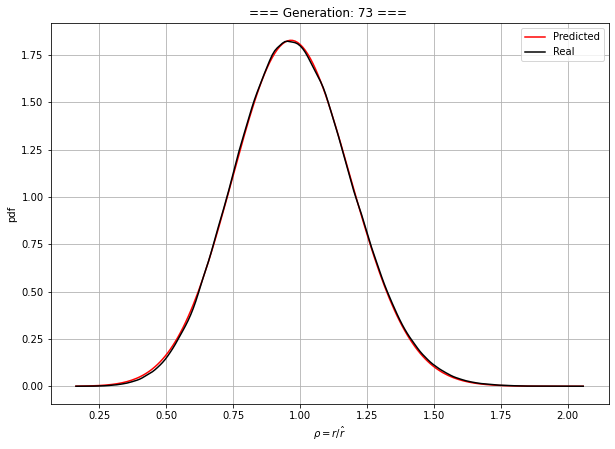

=== Generation: 74 === 
Fitness: 13623.137638835147
Best individual:
Kappa: 2.5580640594962656
Mu: 2.575151563108266
R_hat: 0.9964475918659348



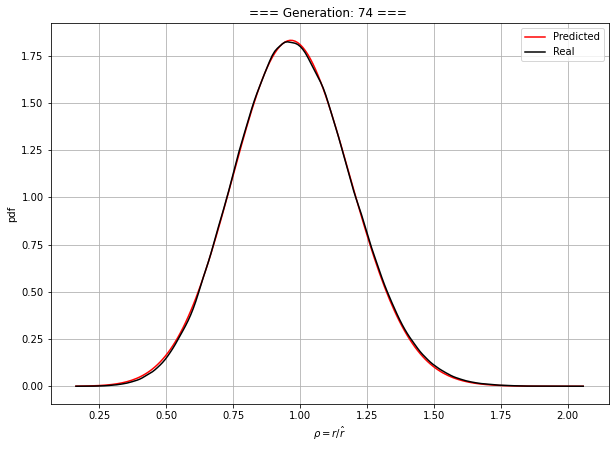

=== Generation: 75 === 
Fitness: 14447.204146421154
Best individual:
Kappa: 2.5187244441181225
Mu: 2.587578330314014
R_hat: 0.9968377503300463



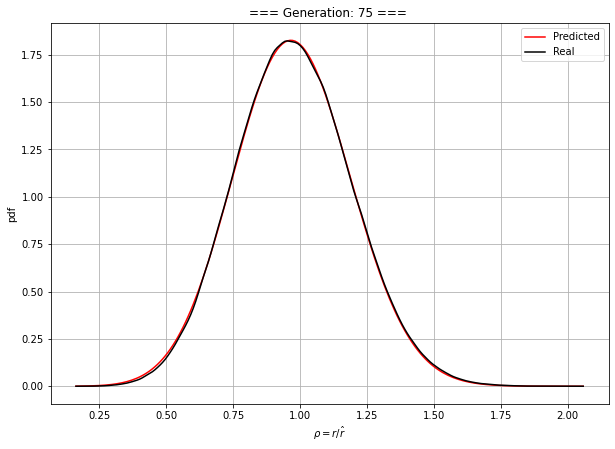

=== Generation: 76 === 
Fitness: 14565.300458656564
Best individual:
Kappa: 2.515609357725667
Mu: 2.596914286009782
R_hat: 0.9969825714866477



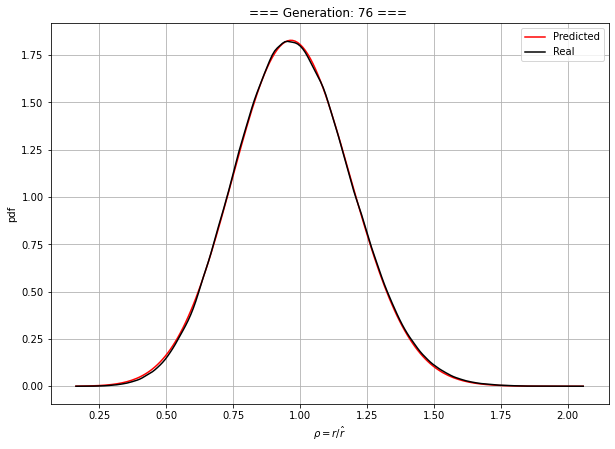

=== Generation: 77 === 
Fitness: 13921.762463009061
Best individual:
Kappa: 2.560892834455903
Mu: 2.5600805718248054
R_hat: 0.9972335567431598



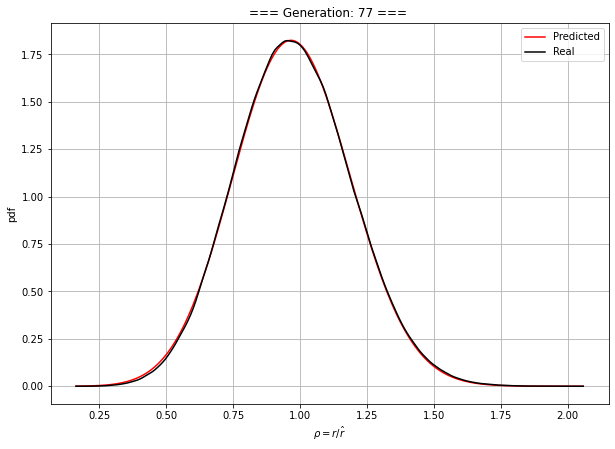

=== Generation: 78 === 
Fitness: 13928.089527677457
Best individual:
Kappa: 2.57889137391548
Mu: 2.553056639270333
R_hat: 0.9966840053471964



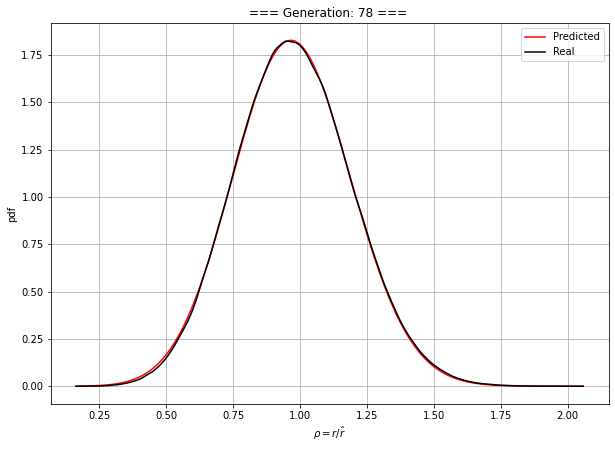

=== Generation: 79 === 
Fitness: 14494.238319760843
Best individual:
Kappa: 2.5257364293984113
Mu: 2.5855676531164185
R_hat: 0.9970069659210569



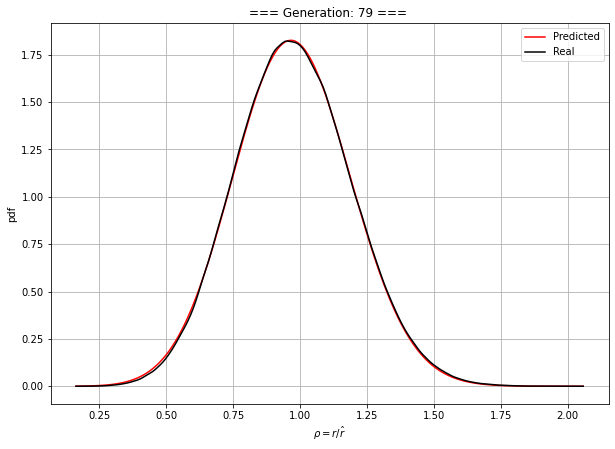

=== Generation: 80 === 
Fitness: 14155.732871119559
Best individual:
Kappa: 2.543371721741716
Mu: 2.573902116069974
R_hat: 0.9973133003202626



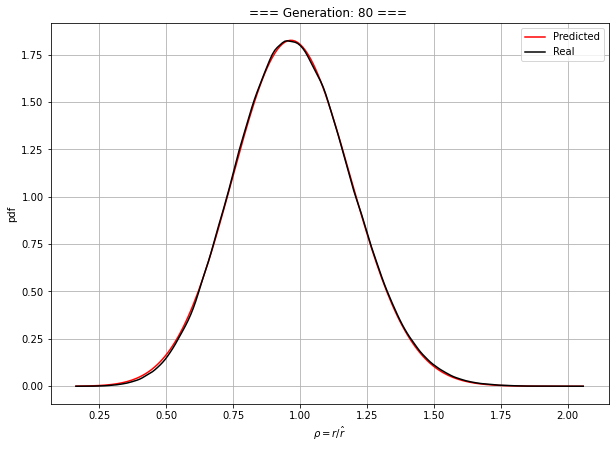

=== Generation: 81 === 
Fitness: 14313.033327210147
Best individual:
Kappa: 2.504659442830196
Mu: 2.607799501907498
R_hat: 0.9973867973390595



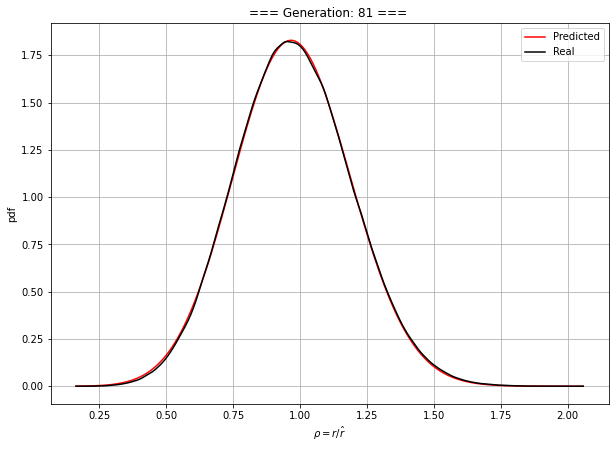

=== Generation: 82 === 
Fitness: 13297.879713092647
Best individual:
Kappa: 2.4949330384290676
Mu: 2.599594503613127
R_hat: 0.9960723536302764



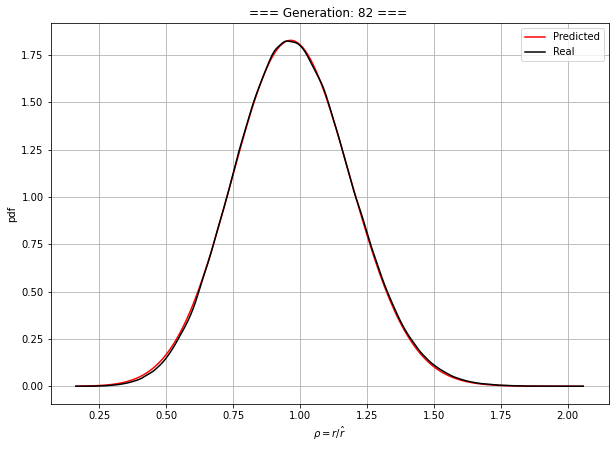

=== Generation: 83 === 
Fitness: 14224.421215892084
Best individual:
Kappa: 2.5463808620944755
Mu: 2.570555570303988
R_hat: 0.9968852370354803



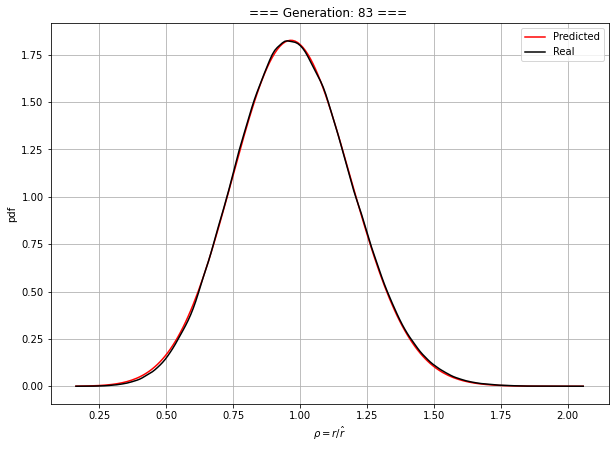

=== Generation: 84 === 
Fitness: 12655.692384881853
Best individual:
Kappa: 2.5828306350632784
Mu: 2.5346261454430357
R_hat: 0.9969773901784384



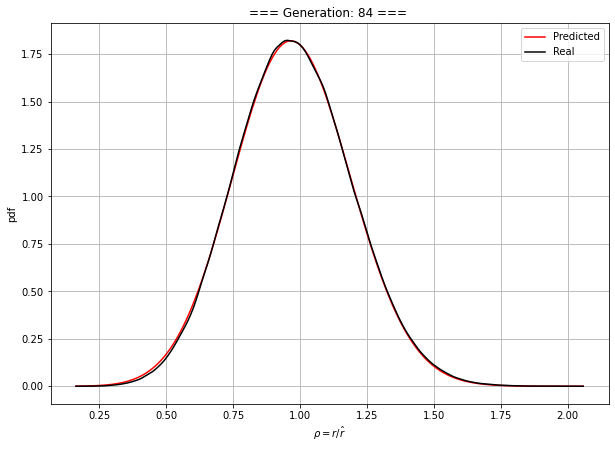

=== Generation: 85 === 
Fitness: 14382.266257128875
Best individual:
Kappa: 2.451916616051481
Mu: 2.6238722871002533
R_hat: 0.9965651453412061



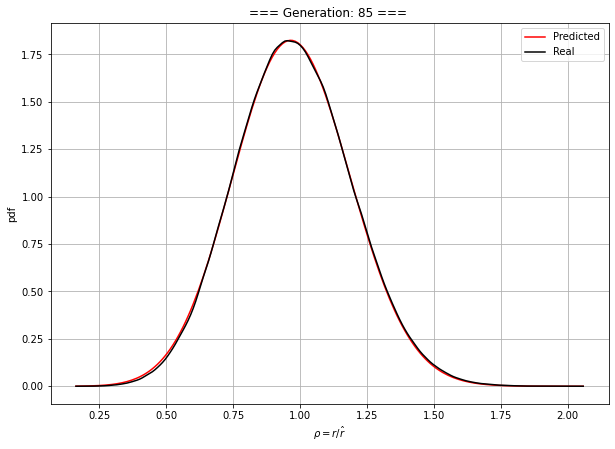

=== Generation: 86 === 
Fitness: 14049.712792147371
Best individual:
Kappa: 2.56735896907182
Mu: 2.566379028851829
R_hat: 0.9968140669662909



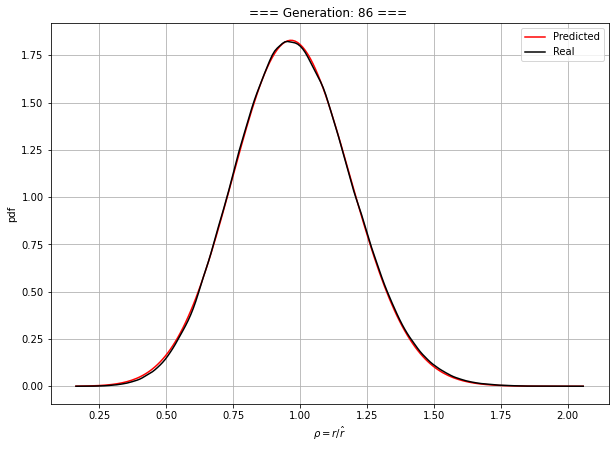

=== Generation: 87 === 
Fitness: 13391.104443801825
Best individual:
Kappa: 2.5693809975091306
Mu: 2.572353149037233
R_hat: 0.9965558168224842



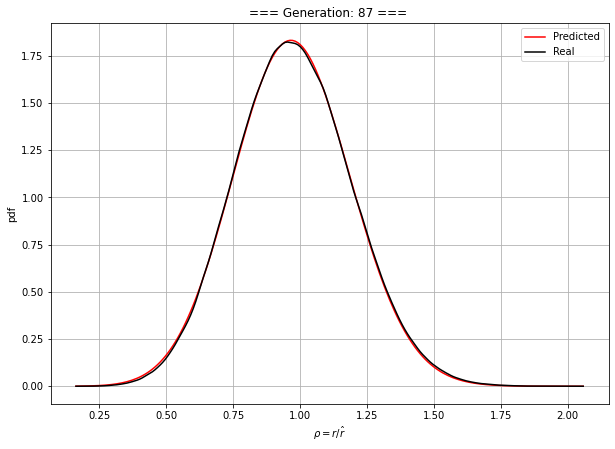

=== Generation: 88 === 
Fitness: 13702.317394992167
Best individual:
Kappa: 2.603810803618839
Mu: 2.540619506955494
R_hat: 0.9972358864308083



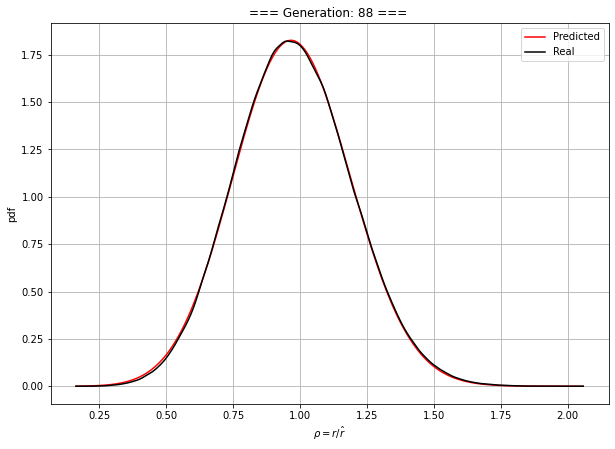

=== Generation: 89 === 
Fitness: 12998.089631636607
Best individual:
Kappa: 2.5591973691417906
Mu: 2.57525095773661
R_hat: 0.9961239780180745



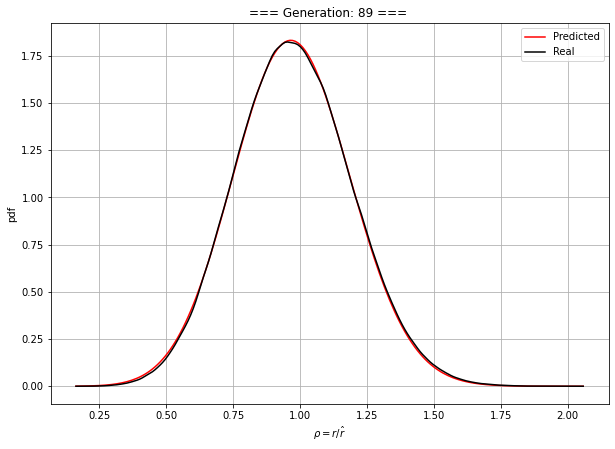

=== Generation: 90 === 
Fitness: 14156.15729387395
Best individual:
Kappa: 2.511111450847878
Mu: 2.5921419370801724
R_hat: 0.9964963516634829



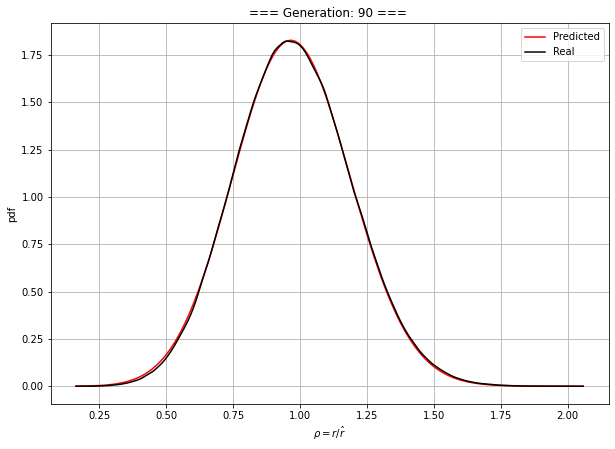

=== Generation: 91 === 
Fitness: 14334.719285348348
Best individual:
Kappa: 2.5383847018675936
Mu: 2.5787596607750753
R_hat: 0.9971914730505504



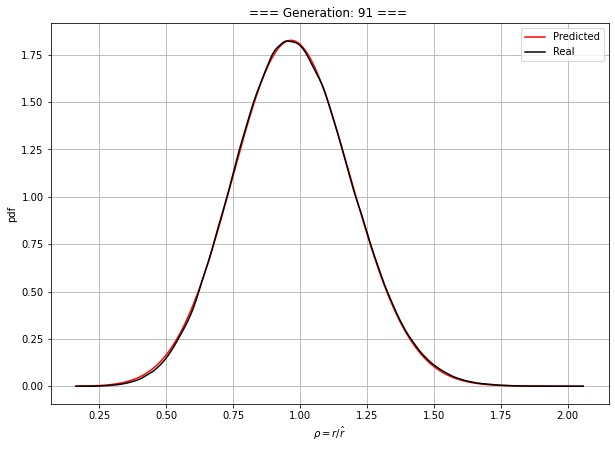

=== Generation: 92 === 
Fitness: 13847.260497084797
Best individual:
Kappa: 2.5728021405897987
Mu: 2.5631242040462805
R_hat: 0.9973283668291713



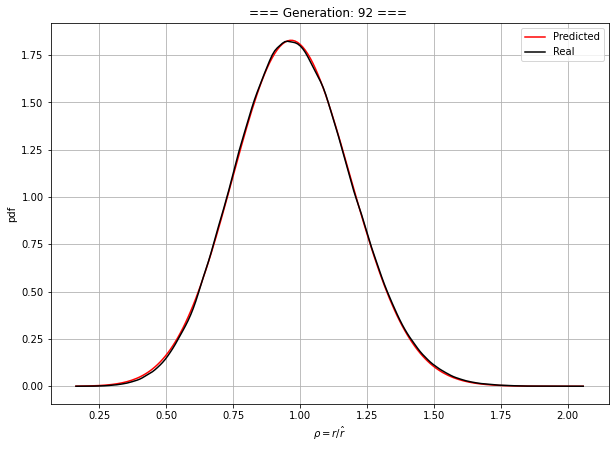

=== Generation: 93 === 
Fitness: 13018.809215829284
Best individual:
Kappa: 2.5655344906145987
Mu: 2.565523544269209
R_hat: 0.9960388994045066



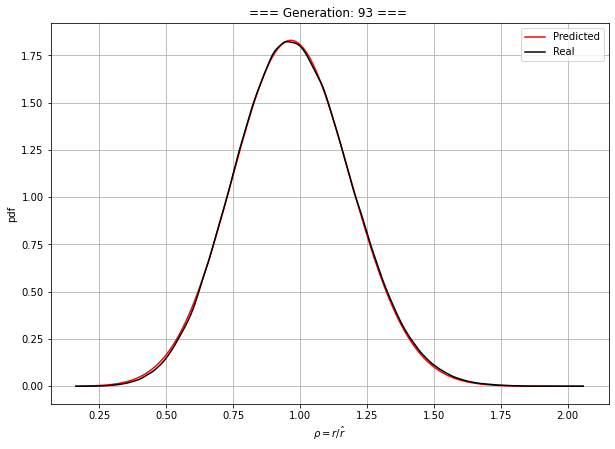

=== Generation: 94 === 
Fitness: 14351.622146063832
Best individual:
Kappa: 2.4595413812780094
Mu: 2.6290201344223094
R_hat: 0.9963739227709146



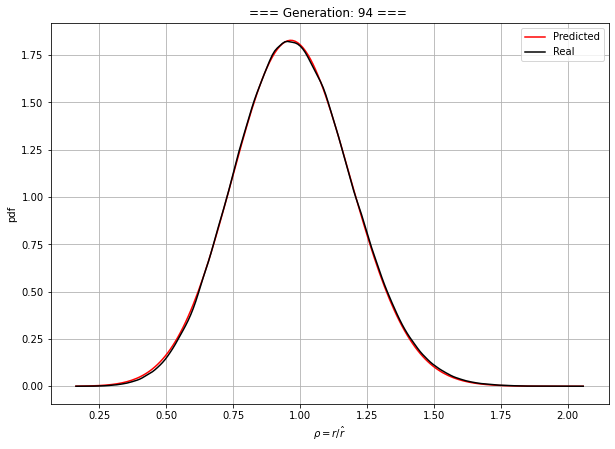

=== Generation: 95 === 
Fitness: 14203.186234092715
Best individual:
Kappa: 2.53473118022311
Mu: 2.589503712213926
R_hat: 0.9969979277480119



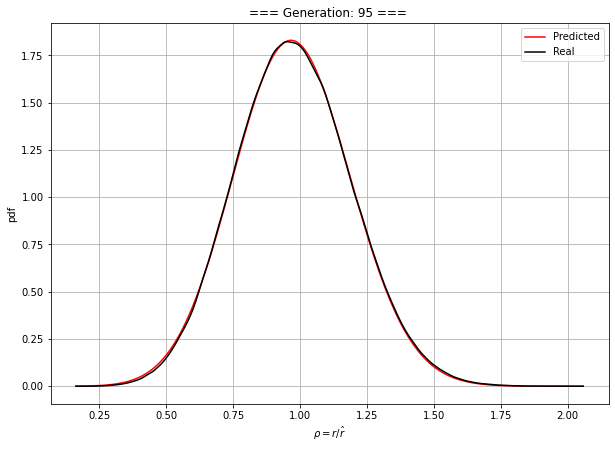

=== Generation: 96 === 
Fitness: 13910.811058135067
Best individual:
Kappa: 2.5900941279159295
Mu: 2.5518519225933547
R_hat: 0.9970123034978676



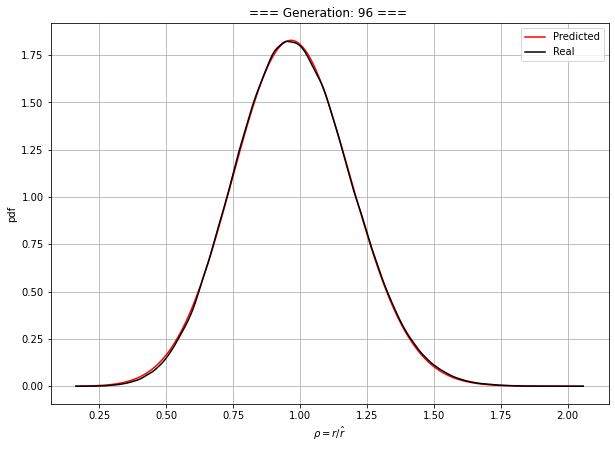

=== Generation: 97 === 
Fitness: 14166.341480724433
Best individual:
Kappa: 2.562384082074057
Mu: 2.567803529673878
R_hat: 0.9969617319603945



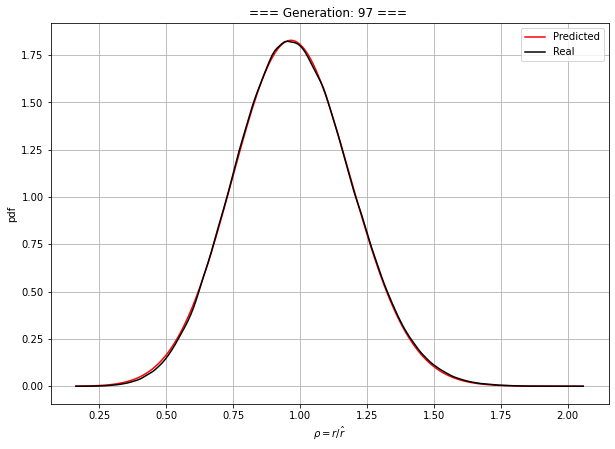

=== Generation: 98 === 
Fitness: 12706.917301107025
Best individual:
Kappa: 2.498373801104252
Mu: 2.6092309880321616
R_hat: 0.9982668717488367



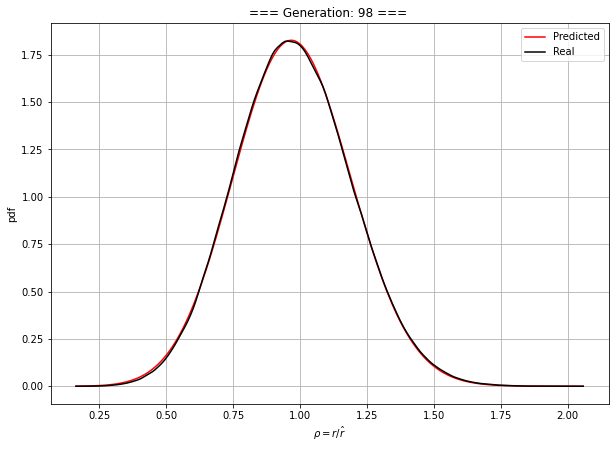

=== Generation: 99 === 
Fitness: 14378.453427205417
Best individual:
Kappa: 2.5266397960779474
Mu: 2.5840163904100044
R_hat: 0.9972402757170878



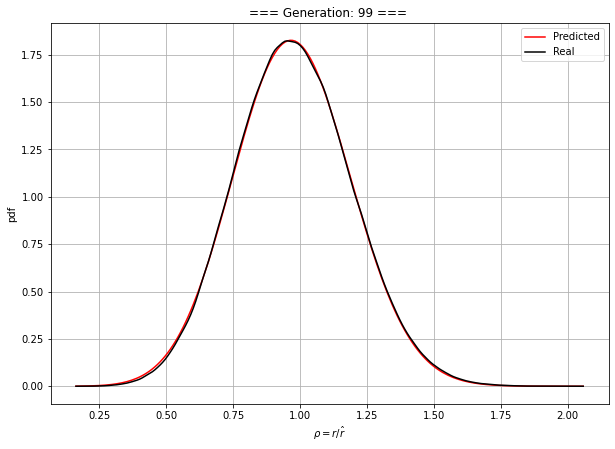

Max number of generations exceeded!

Best Fitness: 15097.799082665058
Best Gen: 62
Kappa: 2.4452569359502108
Mu: 2.643610825702614
r_hat: 0.9972769637565707


In [6]:
solutions = []
bestParams = []
bestCriteria = 0
bestGen = 0


# Generate solutions (chromossomes)
for s in range(nPopulation):
  solutions.append((random.uniform(0.01, 10), # kappa
                      random.uniform(0.01, 10), # mu
                      random.uniform(1, 10))) # r_hat

# Evolutionary Loop
for i in range(nMaxGen):
  rankedSolutions = []	
  for s in solutions:
    rankedSolutions.append( (fitness(s[0],s[1],s[2]), s) )
  rankedSolutions.sort()
  rankedSolutions.reverse()
  
  print(f'=== Generation: {i} === ')
  print(f'Fitness: {rankedSolutions[0][0]}')
  print('Best individual:')
  print(f'Kappa: {rankedSolutions[0][1][0]}')
  print(f'Mu: {rankedSolutions[0][1][1]}')
  print(f'R_hat: {rankedSolutions[0][1][2]}\n')

  plt.figure(figsize=((10,7)))
  plt.plot(ku.X, computePDF(ku.X, rankedSolutions[0][1][0], rankedSolutions[0][1][1], rankedSolutions[0][1][2]), "r", label='Predicted')
  plt.plot(ku.X, ku.Y, "k", label='Real')
  plt.title(f'=== Generation: {i} === ')
  plt.legend()
  plt.grid(True)
  plt.xlabel(r'$\rho=r/\hat{r}$')
  plt.ylabel('pdf')
  if savePlots: 
    plt.savefig(f'plots/gen/gen_{i}.png')
  
  if showPlots:
    plt.show()
  else: 
    plt.clf()

  # Stop Criterion:
  if rankedSolutions[0][0] > bestCriteria:
    bestCriteria = rankedSolutions[0][0]
    bestGen = i
    bestParams = rankedSolutions[0][1]

  # Stop Criterion: Fitness > 100k
  if rankedSolutions[0][0] > 100000:
    print('='*10+'\n'+'Stopped by fitness criteria!\n'+'='*10+'\n')
    # print('='*10)
    # print('Stopped by fitness criteria!')
    # print('='*10)
    print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
    print('Kappa: {}\nMu: {}\nr_hat: {}'.format(bestParams[0],bestParams[1],bestParams[2]))
    break

  # Combine the best solutions and make a new solution of those combined solutions
  bestSolutions = rankedSolutions[:100]
  elements = [] 
  for s in bestSolutions:
    elements.append(s[1][0])
    elements.append(s[1][1])
    elements.append(s[1][2])

  newGen = []
  for _ in range(nPopulation):
    e1 = random.choice(elements) * random.uniform(0.99,1.01) # Mutation of 2%
    e2 = random.choice(elements) * random.uniform(0.99,1.01) # Mutation of 2%
    e3 = random.choice(elements) * random.uniform(0.99,1.01) # Mutation of 2%

    newGen.append((e1,e2,e3))


  solutions = newGen
  
  if i == nMaxGen-1:
    print('='*10+'\n'+'Max number of generations exceeded!\n'+'='*10+'\n')
    # print()
    # print('='*10)
    print('Best Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
    print('Kappa: {}\nMu: {}\nr_hat: {}'.format(bestParams[0],bestParams[1],bestParams[2]))

In [7]:
# !zip -r '/content/plots/plots.zip' '/content/plots/gen2' 